# Energy Dataset Exploratory Data Analysis

This dataset is taken from a [Git Repository](https://github.com/LuisM78/Appliances-energy-prediction-data) of data for the publication:

Data driven prediction models of energy use of appliances in a low-energy house. Luis M. Candanedo, Véronique Feldheim, Dominique Deramaix. Energy and Buildings, Volume 140, 1 April 2017, Pages 81-97, ISSN 0378-7788, http://dx.doi.org/10.1016/j.enbuild.2017.01.083.

## EDA Plan
> Sourced from [Chloe Mawer, Jonathan Whitmore - Exploratory data analysis in python - PyCon 2017](https://www.youtube.com/watch?v=W5WE9Db2RLU)

Exploratory data analysis consists of the following major tasks, which we present linearly here because each task doesn't make much sense to do without the ones prior to it. However, in reality, you are going to constantly jump around from step to step.  You may want to do all the steps for a subset of the variables first. Or often, an observation will bring up a question you want to investigate and you'll branch off and explore to answer that question before returning down the main path of exhaustive EDA.

1. Form hypotheses/develop investigation themes to explore 
3. Wrangle data 
3. Assess quality of data 
4. Profile data
5. Explore each individual variable in the dataset
6. Assess the relationship between each variable and the target 
7. Assess interactions between variables 
8. Explore data across many dimensions 

Throughout the entire analysis you want to:
* Capture a list of hypotheses and questions that come up for further exploration.
* Record things to watch out for/ be aware of in future analyses. 
* Show intermediate results to colleagues to get a fresh perspective, feedback, domain knowledge. Don't do EDA in a bubble! Get feedback throughout especially from people removed from the problem and/or with relevant domain knowledge. 
* Position visuals and results together. EDA relies on your natural pattern recognition abilities so maximize what you'll find by putting visualizations and results in close proximity. 

## The Task

Do an Exploratory Data Analysis on the energy dataset. <br> Keeping in mind : **Understand energy usage by appliances and the attributes that contribute to aggregate energy usage.**

### General Tips Followed 
> [Chloe Mawer, Jonathan Whitmore - Exploratory Data Analysis in Python - PyCon 2017](https://www.youtube.com/watch?v=W5WE9Db2RLU)

> - Before plotting/joining/doing something, have a question or hypothesis that you want to investigate
> - Draw a plot of what you want to see on paper to sketch the idea
> - Write it down, then make the plan on how to get there
> - How do you know you aren't fooling yourself
> - What else can I check if this is actually true?
> - What evidence could there be that it's wrong?

### Tidy Data
> Hadley Wickham's concept of a **tidy dataset** summarized as:

> - Each variable forms a column
> - Each observation forms a row
> - Each type of observational unit forms a table

In [182]:
# Uncomment and run if any of the following libraries not available
#!pip install tqdm
#!pip install missingno
#!pip install pandas_profiling
#!pip install folium
#!pip install pivottablejs

In [183]:
# To output plotting commands display inline within frontends
%matplotlib inline
#To obtain retina-display quality for figures into code
%config InlineBackend.figure_format='retina'

# To use features which will appear in newer versions while having an older release of Python
from __future__ import absolute_import, division, print_function

# Plotting
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.pyplot import GridSpec
import seaborn as sns
sns.set_context("poster", font_scale=1.3)
import folium

# Basic Wrangling 
import numpy as np
import pandas as pd
from pandas.tools.plotting import scatter_matrix

# System Packages 
import os, sys
import warnings
warnings.filterwarnings('ignore')

# EDA Tools 
import missingno as msno
import pandas_profiling
import pivottablejs

#from tqdm import tqdm
from sklearn.datasets import make_blobs
import time

# More Technical EDA
import sklearn
import scipy

# Update matplotlib defaults to something nicer 
mpl_update = {'font.size':16,
              'xtick.labelsize':14,
              'ytick.labelsize':14,
              'figure.figsize':[12.0,8.0],
              'axes.color_cycle':['#0055A7', '#2C3E4F', '#26C5ED', '#00cc66', '#D34100', '#FF9700','#091D32'], 
              'axes.labelsize':20,
              'axes.labelcolor':'#677385',
              'axes.titlesize':20,
              'lines.color':'#0055A7',
              'lines.linewidth':3,
              'text.color':'#677385'}
mpl.rcParams.update(mpl_update)

### Description of the Data Columns (Units)
> Where indicated, data from the nearest airport weather station (Chièvres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis, rp5.ru. Permission was obtained from Reliable Prognosis for the distribution of the **4 months of data**.
<table>
    <thead class="valign-top">
        <tr>
            <th scope="col" class="rowsep-1 align-left">Variables, Description</th>
            <th scope="col" class="rowsep-1 align-left">Units</th>
            <th scope="col" class="rowsep-1 align-left">Number of Features</th>
        </tr>
    </thead>
    <tbody>
        <tr>
        <th class="align-left" scope="row">date, Date time stamp</th>
            <td class="align-left">year-month-day hour:min:s</td>
            <td class="align-char">–</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">Appliances, Appliances energy consumption</th>
            <td class="align-left">Wh</td>
            <td class="align-char">1</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">Lights, Light energy consumption</th>
            <td class="align-left">Wh</td>
            <td class="align-char">2</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">T1, Temperature in kitchen area</th>
            <td class="align-left">°C</td>
            <td class="align-char">3</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">RH_1, Humidity in kitchen area</th>
            <td class="align-left">%</td>
            <td class="align-char">4</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">T2, Temperature in living room area</th>
            <td class="align-left">°C</td>
            <td class="align-char">5</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">RH_2, Humidity in living room area</th>
            <td class="align-left">%</td>
            <td class="align-char">6</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">T3, Temperature in laundry room area</th>
            <td class="align-left">°C</td>
            <td class="align-char">7</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">RH_3, Humidity in laundry room area</th>
            <td class="align-left">%</td>
            <td class="align-char">8</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">T4, Temperature in office room</th>
            <td class="align-left">°C</td>
            <td class="align-char">9</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">RH_4, Humidity in office room</th>
            <td class="align-left">%</td>
            <td class="align-char">10</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">T5, Temperature in bathroom</th>
            <td class="align-left">°C</td>
            <td class="align-char">11</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">RH_5, Humidity in bathroom</th>
            <td class="align-left">%</td>
            <td class="align-char">12</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">T6, Temperature outside the building (north side)</th>
            <td class="align-left">°C</td>
            <td class="align-char">13</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">RH_6, Humidity outside the building (north side)</th>
            <td class="align-left">%</td>
            <td class="align-char">14</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">T7, Temperature in ironing room</th>
            <td class="align-left">°C</td>
            <td class="align-char">15</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">RH_7, Humidity in ironing room</th>
            <td class="align-left">%</td>
            <td class="align-char">16</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">T8, Temperature in teenager room 2</th>
            <td class="align-left">°C</td>
            <td class="align-char">17</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">RH_8, Humidity in teenager room 2</th>
            <td class="align-left">%</td>
            <td class="align-char">18</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">T9, Temperature in parents room</th>
            <td class="align-left">°C</td>
            <td class="align-char">19</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">RH_9, Humidity in parents room</th>
            <td class="align-left">%</td>
            <td class="align-char">20</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">T_out, Temperature outside (from Chièvres weather station)</th>
            <td class="align-left">°C</td>
            <td class="align-char">21</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">Press_mm_hg, Pressure (from Chièvres weather station)</th>
            <td class="align-left">mm Hg</td>
            <td class="align-char">22</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">RH_out, Humidity outside (from Chièvres weather station)</th>
            <td class="align-left">%</td>
            <td class="align-char">23</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">Windspeed, Windspeed (from Chièvres weather station)</th>
            <td class="align-left">m/s</td>
            <td class="align-char">24</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">Visibility, Visibility (from Chièvres weather station)</th>
            <td class="align-left">km</td>
            <td class="align-char">25</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">Tdewpoint, Dew point temp (from Chièvres weather station)</th>
            <td class="align-left">°C</td>
            <td class="align-char">26</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">rv1, Random Variable 1</th>
            <td class="align-left">Non dimensional</td>
            <td class="align-char">27</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">rv2, Random Variable 2</th>
            <td class="align-left">Non dimensional</td>
            <td class="align-char">28</td>
        </tr>
    </tbody>
</table>

## Data Quality Assessment and Profiling
[PyCon2017 Link](https://www.youtube.com/watch?v=W5WE9Db2RLU)
Before trying to understand what information is in the data, make sure to understand what the data represents and what's missing.

### Overview 
####  Basic things to do 
* Categorical: count, count distinct, assess unique values 
* Numerical: count, min, max
* Spot-check random samples and samples that you are familiar with 
* Slice and dice 

#### Main questions
* What data isn't there? 
* Is the data that is there right? 
* Is the data being generated the way you think? 

**Other Questions to consider:**
* Are there frequent values that are default values? 
* Are there fields that represent the same information? 
* What timestamp, if any, should you use? 
* Are there numerical values reported as strings? 
* Are there special values? 
* Are there variables that are numerical but really should be categorical? 
* Is data consistent across? 
* Are there any direct relationships between fields? 
* What are the units of measurement? Are they consistent? 
* Are there obvious changes in reported data around the time of important events that affect data generation (e.g. version release)?

#### Helpful packages
* [`missingno`](https://github.com/ResidentMario/missingno)
* [`pivottablejs`](https://github.com/nicolaskruchten/jupyter_pivottablejs)
* [`pandas_profiling`](https://github.com/JosPolfliet/pandas-profiling)

#### Example backlog
* Assess the prevalence of missing data across all data fields, assess whether its missing is random or systematic, and identify patterns when such data is missing
* Identify any default values that imply missing data for a given field
* Determine sampling strategy for quality assessment and initial EDA
* For datetime data types, ensure consistent formatting and granularity of data, and perform sanity checks on all dates present in the data.
* In cases where multiple fields capture the same or similar information, understand the relationships between them and assess the most effective field to use
* Assess data type of each field
* For discrete value types, ensure data formats are consistent
* For discrete value types, assess number of distinct values and percent unique and do sanity check on types of answers
* For continuous data types, assess descriptive statistics and perform sanity check on values 
* Understand relationships between timestamps and assess which to use in analysis
* Slice data by device type, operating system, software version and ensure consistency in data across slices
* For device or app data, identify version release dates and assess data for any changes in format or value around those dates

### Missing data
*What data isn’t there?*

Questions to be considering
* Are there systematic reasons for missing data? 
* Are there fields that are always missing at the same time ? 
* Is there information in what data is missing?

In [184]:
# Loading the data from the Case Study GitHub
#df = pd.read_csv("https://raw.githubusercontent.com/eklavyasaxena/Advances-in-Data-Sciences-and-Architecture/master/ADS_CaseStudy_2/Data_for_EnergyCaseStudy/energydata_complete.csv")
df_loaded = pd.read_csv("../Data_for_EnergyCaseStudy/energydata_complete.csv")
df = df_loaded

In [185]:
df.shape

(19735, 29)

In [186]:
df.head()

date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2  2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3  2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4  2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4    ...             T9   RH_9     T_out  \
0  19.79  44.730000  19.000000    ...      17.033333  45.53  6.600000   
1  19.79  44.790000  19.000000    ...      17.066667  45.56  6.483333   
2  19.79  44.933333  18.926667    ...      17.000000  45.50  6.366667   
3  19.79  45.000000  18.890000    ...      17.000000  45.40  6.250000   
4  19.79  45.000000  18.890000    ...      17.000000  45.40  6.133333   

   Press_mm_hg  RH_out  Windspeed  Visibility  Tdewpoint        rv1        rv2  
0        733.5    92.0   7.000000   63.000000        5.3  13.275433  13.275433  
1        733.6    92.0   6.666667   59.166667        5.2  18.606195  18.606195  
2        733.7    92.0   6.333333   55.333333        5.1  28.642668  28.642668  
3        733.8    92.0   6.000000   51.500000        5.0  45.410389  45.410389  
4        733.9    92.0   5.666667   47.666667        4.9  10.084097  10.084097  

[5 rows x 29 columns]

In [187]:
df.describe().T

count        mean         std         min         25%  \
Appliances   19735.0   97.694958  102.524891   10.000000   50.000000   
lights       19735.0    3.801875    7.935988    0.000000    0.000000   
T1           19735.0   21.686571    1.606066   16.790000   20.760000   
RH_1         19735.0   40.259739    3.979299   27.023333   37.333333   
T2           19735.0   20.341219    2.192974   16.100000   18.790000   
RH_2         19735.0   40.420420    4.069813   20.463333   37.900000   
T3           19735.0   22.267611    2.006111   17.200000   20.790000   
RH_3         19735.0   39.242500    3.254576   28.766667   36.900000   
T4           19735.0   20.855335    2.042884   15.100000   19.530000   
RH_4         19735.0   39.026904    4.341321   27.660000   35.530000   
T5           19735.0   19.592106    1.844623   15.330000   18.277500   
RH_5         19735.0   50.949283    9.022034   29.815000   45.400000   
T6           19735.0    7.910939    6.090347   -6.065000    3.626667   
RH_6         19735.0   54.609083   31.149806    1.000000   30.025000   
T7           19735.0   20.267106    2.109993   15.390000   18.700000   
RH_7         19735.0   35.388200    5.114208   23.200000   31.500000   
T8           19735.0   22.029107    1.956162   16.306667   20.790000   
RH_8         19735.0   42.936165    5.224361   29.600000   39.066667   
T9           19735.0   19.485828    2.014712   14.890000   18.000000   
RH_9         19735.0   41.552401    4.151497   29.166667   38.500000   
T_out        19735.0    7.411665    5.317409   -5.000000    3.666667   
Press_mm_hg  19735.0  755.522602    7.399441  729.300000  750.933333   
RH_out       19735.0   79.750418   14.901088   24.000000   70.333333   
Windspeed    19735.0    4.039752    2.451221    0.000000    2.000000   
Visibility   19735.0   38.330834   11.794719    1.000000   29.000000   
Tdewpoint    19735.0    3.760707    4.194648   -6.600000    0.900000   
rv1          19735.0   24.988033   14.496634    0.005322   12.497889   
rv2          19735.0   24.988033   14.496634    0.005322   12.497889   

                    50%         75%          max  
Appliances    60.000000  100.000000  1080.000000  
lights         0.000000    0.000000    70.000000  
T1            21.600000   22.600000    26.260000  
RH_1          39.656667   43.066667    63.360000  
T2            20.000000   21.500000    29.856667  
RH_2          40.500000   43.260000    56.026667  
T3            22.100000   23.290000    29.236000  
RH_3          38.530000   41.760000    50.163333  
T4            20.666667   22.100000    26.200000  
RH_4          38.400000   42.156667    51.090000  
T5            19.390000   20.619643    25.795000  
RH_5          49.090000   53.663333    96.321667  
T6             7.300000   11.256000    28.290000  
RH_6          55.290000   83.226667    99.900000  
T7            20.033333   21.600000    26.000000  
RH_7          34.863333   39.000000    51.400000  
T8            22.100000   23.390000    27.230000  
RH_8          42.375000   46.536000    58.780000  
T9            19.390000   20.600000    24.500000  
RH_9          40.900000   44.338095    53.326667  
T_out          6.916667   10.408333    26.100000  
Press_mm_hg  756.100000  760.933333   772.300000  
RH_out        83.666667   91.666667   100.000000  
Windspeed      3.666667    5.500000    14.000000  
Visibility    40.000000   40.000000    66.000000  
Tdewpoint      3.433333    6.566667    15.500000  
rv1           24.897653   37.583769    49.996530  
rv2           24.897653   37.583769    49.996530

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
date           19735 non-null object
Appliances     19735 non-null int64
lights         19735 non-null int64
T1             19735 non-null float64
RH_1           19735 non-null float64
T2             19735 non-null float64
RH_2           19735 non-null float64
T3             19735 non-null float64
RH_3           19735 non-null float64
T4             19735 non-null float64
RH_4           19735 non-null float64
T5             19735 non-null float64
RH_5           19735 non-null float64
T6             19735 non-null float64
RH_6           19735 non-null float64
T7             19735 non-null float64
RH_7           19735 non-null float64
T8             19735 non-null float64
RH_8           19735 non-null float64
T9             19735 non-null float64
RH_9           19735 non-null float64
T_out          19735 non-null float64
Press_mm_hg    19735 non-null float64
RH_out         19735 n

In [189]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S', utc=True)

In [190]:
all_columns = df.columns.tolist()
all_columns

['date',
 'Appliances',
 'lights',
 'T1',
 'RH_1',
 'T2',
 'RH_2',
 'T3',
 'RH_3',
 'T4',
 'RH_4',
 'T5',
 'RH_5',
 'T6',
 'RH_6',
 'T7',
 'RH_7',
 'T8',
 'RH_8',
 'T9',
 'RH_9',
 'T_out',
 'Press_mm_hg',
 'RH_out',
 'Windspeed',
 'Visibility',
 'Tdewpoint',
 'rv1',
 'rv2']

#### Adding Additional Key Features
><table>
    <thead class="valign-top">
        <tr>
            <th scope="col" class="rowsep-1 align-left">Variables, Description</th>
            <th scope="col" class="rowsep-1 align-left">Units</th>
            <th scope="col" class="rowsep-1 align-left">Number of Features</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <th class="align-left" scope="row">NSM, Number of seconds from midnight</th>
            <td class="align-left">s</td>
            <td class="align-char">29</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">week_status, Week status (weekend (0) or a weekday (1))</th>
            <td class="align-left">Factor/categorical</td>
            <td class="align-char">30</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">day_of_week, Day of week (Monday(0), Tuesday(1)… Sunday(6))</th>
            <td class="align-left">Factor/categorical</td>
            <td class="align-char">31</td>
        </tr>
    </tbody>
 </table>

In [191]:
df['NSM'] = df.date.apply(lambda x: x.hour*3600 + x.minute*60 +x.second)

In [192]:
df['day_of_week'] = df.date.apply(lambda x: x.dayofweek)

In [193]:
df['week_status'] = df.day_of_week.apply(lambda x: 0 if (x == 5 or x == 6) else 1)

In [194]:
# To set Datetime column as index of the Dataframe
# df_idx = df.set_index(pd.DatetimeIndex(df['date']))

In [195]:
# Checking if the date column is unique for each and every row:
df.date.nunique() == df.shape[0]

True

In [196]:
# Checking Null Values
df.apply(lambda x: sum(x.isnull()), axis=0)

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
NSM            0
day_of_week    0
week_status    0
dtype: int64

In [197]:
df.head()

date  Appliances  lights     T1       RH_1    T2       RH_2  \
0 2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1 2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2 2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3 2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4 2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4     ...       Press_mm_hg  RH_out  Windspeed  \
0  19.79  44.730000  19.000000     ...             733.5    92.0   7.000000   
1  19.79  44.790000  19.000000     ...             733.6    92.0   6.666667   
2  19.79  44.933333  18.926667     ...             733.7    92.0   6.333333   
3  19.79  45.000000  18.890000     ...             733.8    92.0   6.000000   
4  19.79  45.000000  18.890000     ...             733.9    92.0   5.666667   

   Visibility  Tdewpoint        rv1        rv2    NSM  day_of_week  \
0   63.000000        5.3  13.275433  13.275433  61200            0   
1   59.166667        5.2  18.606195  18.606195  61800            0   
2   55.333333        5.1  28.642668  28.642668  62400            0   
3   51.500000        5.0  45.410389  45.410389  63000            0   
4   47.666667        4.9  10.084097  10.084097  63600            0   

   week_status  
0            1  
1            1  
2            1  
3            1  
4            1  

[5 rows x 32 columns]

## Visualizing the missing-ness of data
https://github.com/ResidentMario/missingno

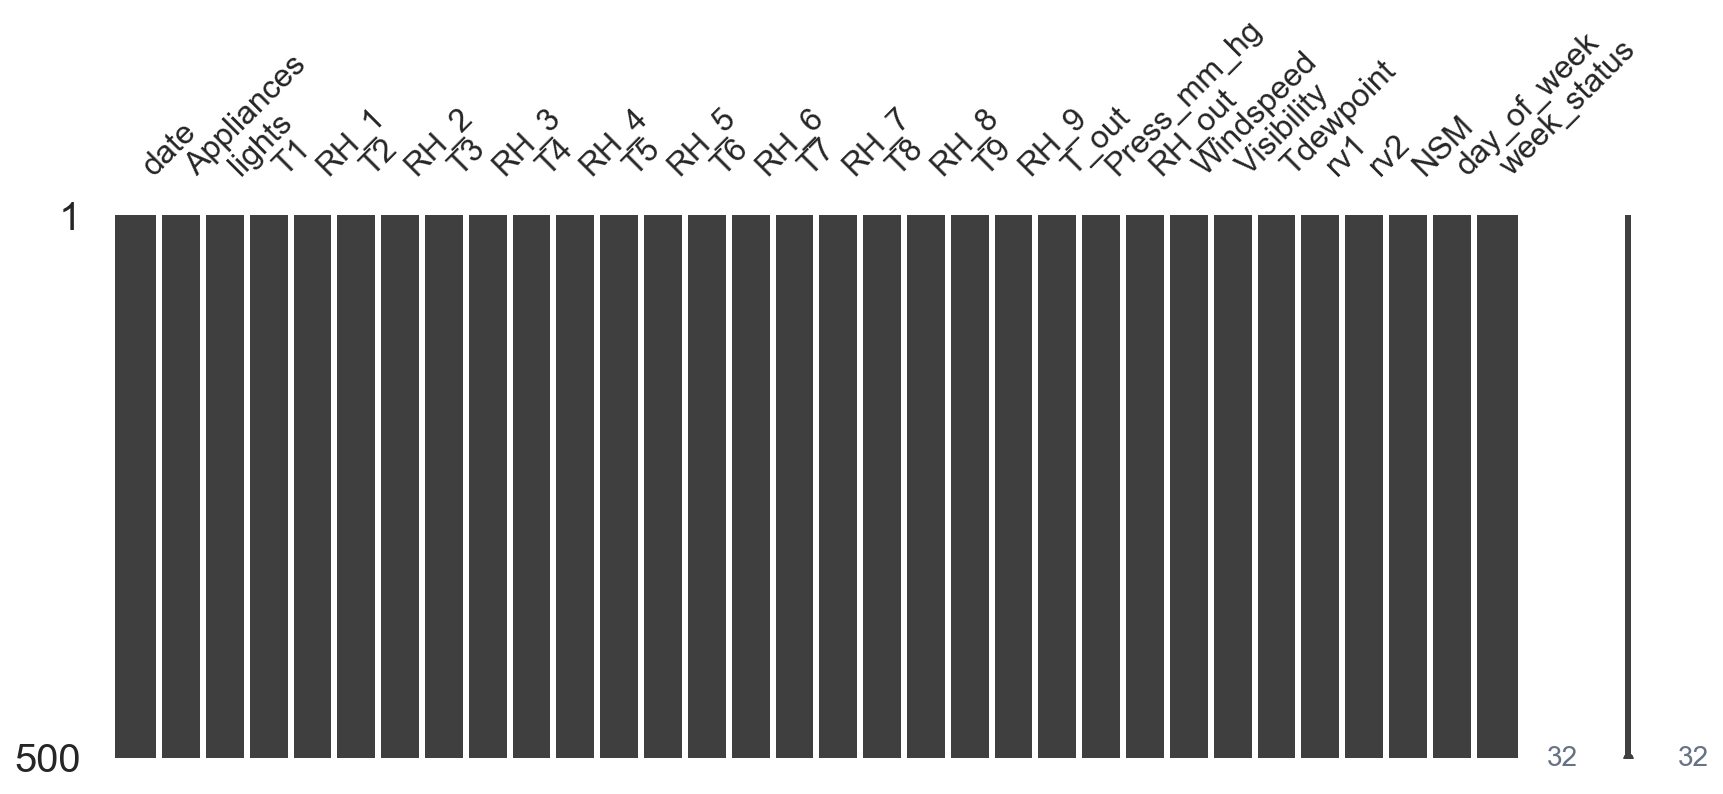

In [198]:
# Matrix of missingness of the data
msno.matrix(df.sample(500), figsize=(14, 5), width_ratios=(14, 1));

It is clear from the above matrix, that there is no data missing. But, following commands can be further used to explorate the missingness:
``` Python
  # Barchart of missingness of the data
  msno.bar(df.sample(500), figsize=(14, 5));
  
  # Correlation patterns in how the data is missing
  msno.heatmap(df.sample(500), figsize=(16, 7));
```

## Visualizing the Data

### Cross-section for Univariate Distributions
For numerical data, look at: 

* *Location*: mean, median, mode, interquartile mean 
* *Spread*: standard deviation, variance, range, interquartile range
* *Shape*: skewness, kurtosis 


### For Bivariate Plots
CATEGORICAL X CATEGORICAL
* [Heat map of contingency table](http://seaborn.pydata.org/generated/seaborn.heatmap.html?highlight=heatmap#seaborn.heatmap) 
* [Multiple bar plots](http://seaborn.pydata.org/tutorial/categorical.html?highlight=bar%20plot#bar-plots) 

CATEGORICAL X CONTINUOUS 
* [Box plots](http://seaborn.pydata.org/generated/seaborn.boxplot.html#seaborn.boxplot) of continuous for each category
* [Violin plots](http://seaborn.pydata.org/examples/simple_violinplots.html) of continuous distribution for each category
* Overlaid [histograms](http://seaborn.pydata.org/tutorial/distributions.html#histograms) (if 3 or less categories)

CONTINUOUS X CONTINOUS 
* [Scatter plots](http://seaborn.pydata.org/examples/marginal_ticks.html?highlight=scatter) 
* [Hexibin plots](http://seaborn.pydata.org/tutorial/distributions.html#hexbin-plots)
* [Joint kernel density estimation plots](http://seaborn.pydata.org/tutorial/distributions.html#kernel-density-estimation)
* [Correlation matrix heatmap](http://seaborn.pydata.org/examples/network_correlations.html?highlight=correlation)

### 1) Energy Consumption by Appliances & Lights

In [199]:
df[['Appliances', 'lights']].describe().astype(int)

Appliances  lights
count       19735   19735
mean           97       3
std           102       7
min            10       0
25%            50       0
50%            60       0
75%           100       0
max          1080      70

### [Skewness and Kurtosis](http://www.itl.nist.gov/div898/handbook/eda/section3/eda35b.htm)

* *Skewness:* measure of lack of symmetry. 
* *Kurtosis:* measure of whether the data are heavily tailed relative to the normal distribution. 

In [200]:
df[['Appliances', 'lights']].apply(scipy.stats.skew)

Appliances    3.386110
lights        2.194988
dtype: float64

Skewness for normal distribution should be zero. Negative skewness indicates skew left and positive skewness indicates skew right.

In [201]:
df[['Appliances', 'lights']].apply(scipy.stats.kurtosis)

Appliances    13.664097
lights         4.460712
dtype: float64

Kurtosis is also zero for a normal distribution and can only be postiive.

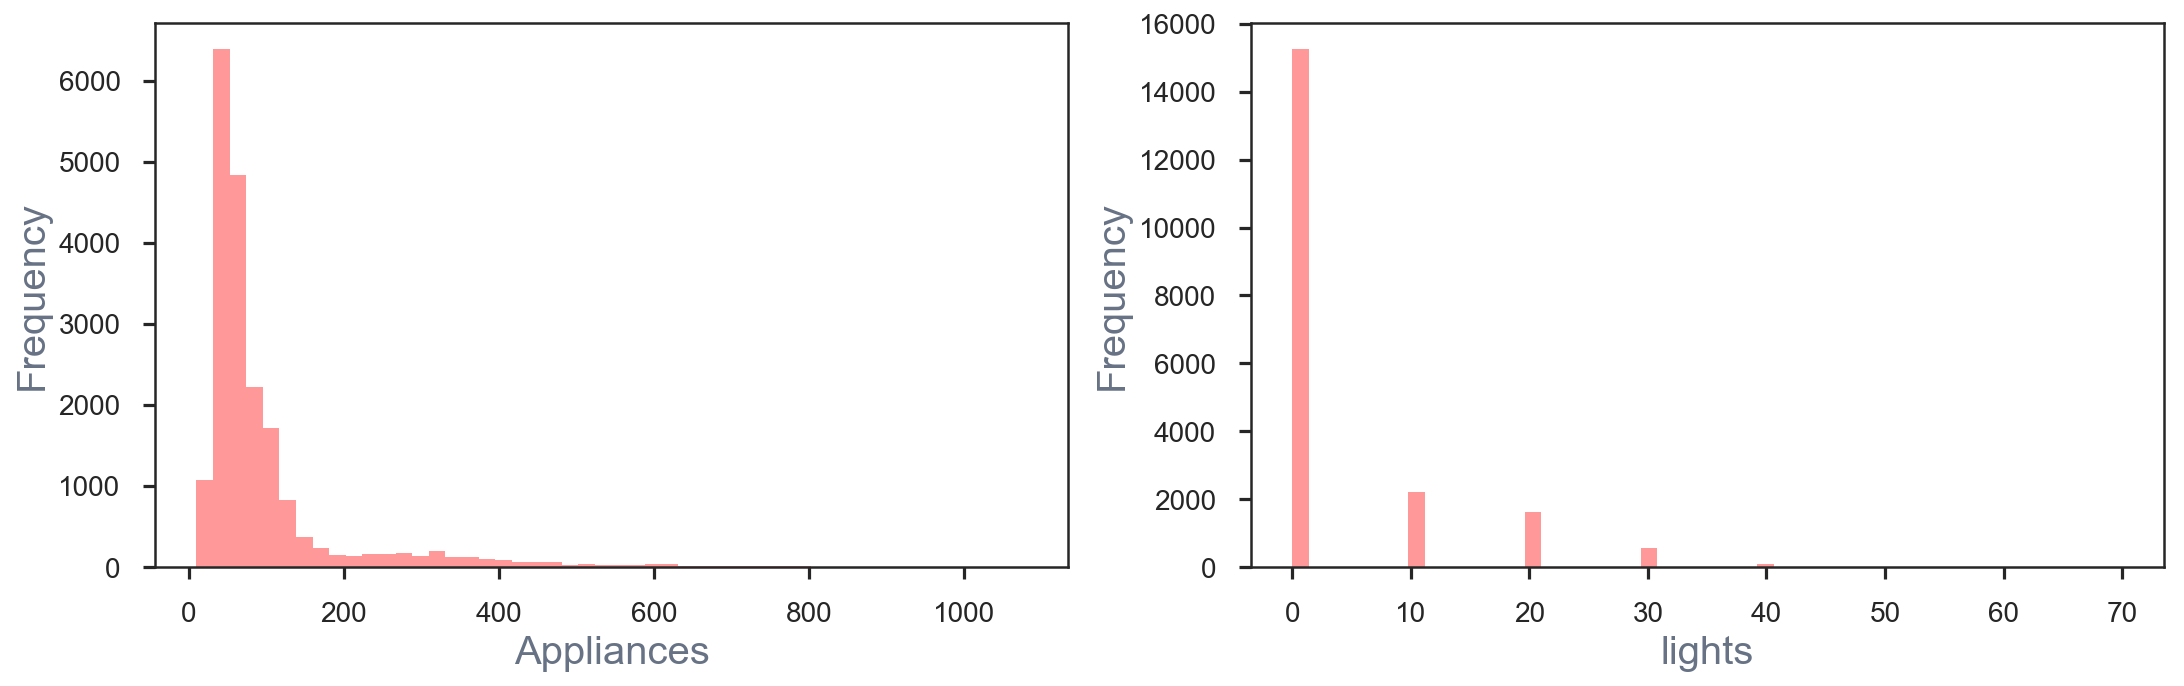

In [202]:
fig, (ax1, ax2) = plt.subplots(figsize=(18,5), ncols=2)
sns.distplot(df.Appliances, kde=False, color="red", ax=ax1)
sns.distplot(df.lights, kde=False, color="red", ax=ax2)
ax1.set_ylabel("Frequency")
ax2.set_ylabel("Frequency");

In [203]:
# Calculating Percentage of Zero Energy Consumption by Lights
total = df.lights.count()
non_zero_val = df.lights.astype(bool).sum(axis=0)
zero_val_percent = (total - non_zero_val)/total*100
print(zero_val_percent)

77.2840131746


* Appliances: Majority consumption is in the **range of 0 ~ 200 kWh**
* Lights: **77%** of observations hace **ZERO** Lights Energy Consumption

### Log Transform
> Taking a log transform will make a variable more normal. 

In [204]:
df[['Appliances', 'lights']].apply(np.log).apply(scipy.stats.skew)

Appliances    1.165728
lights             NaN
dtype: float64

It does reduce skewness but does not make it disappear. Also, for 'lights' most of the data is 0 and log is undefined.

In [205]:
df[['Appliances', 'lights']].apply(np.log).apply(scipy.stats.kurtosis)

Appliances    1.550408
lights             NaN
dtype: float64

Again, it reduces but does not get rid of kurtosis.

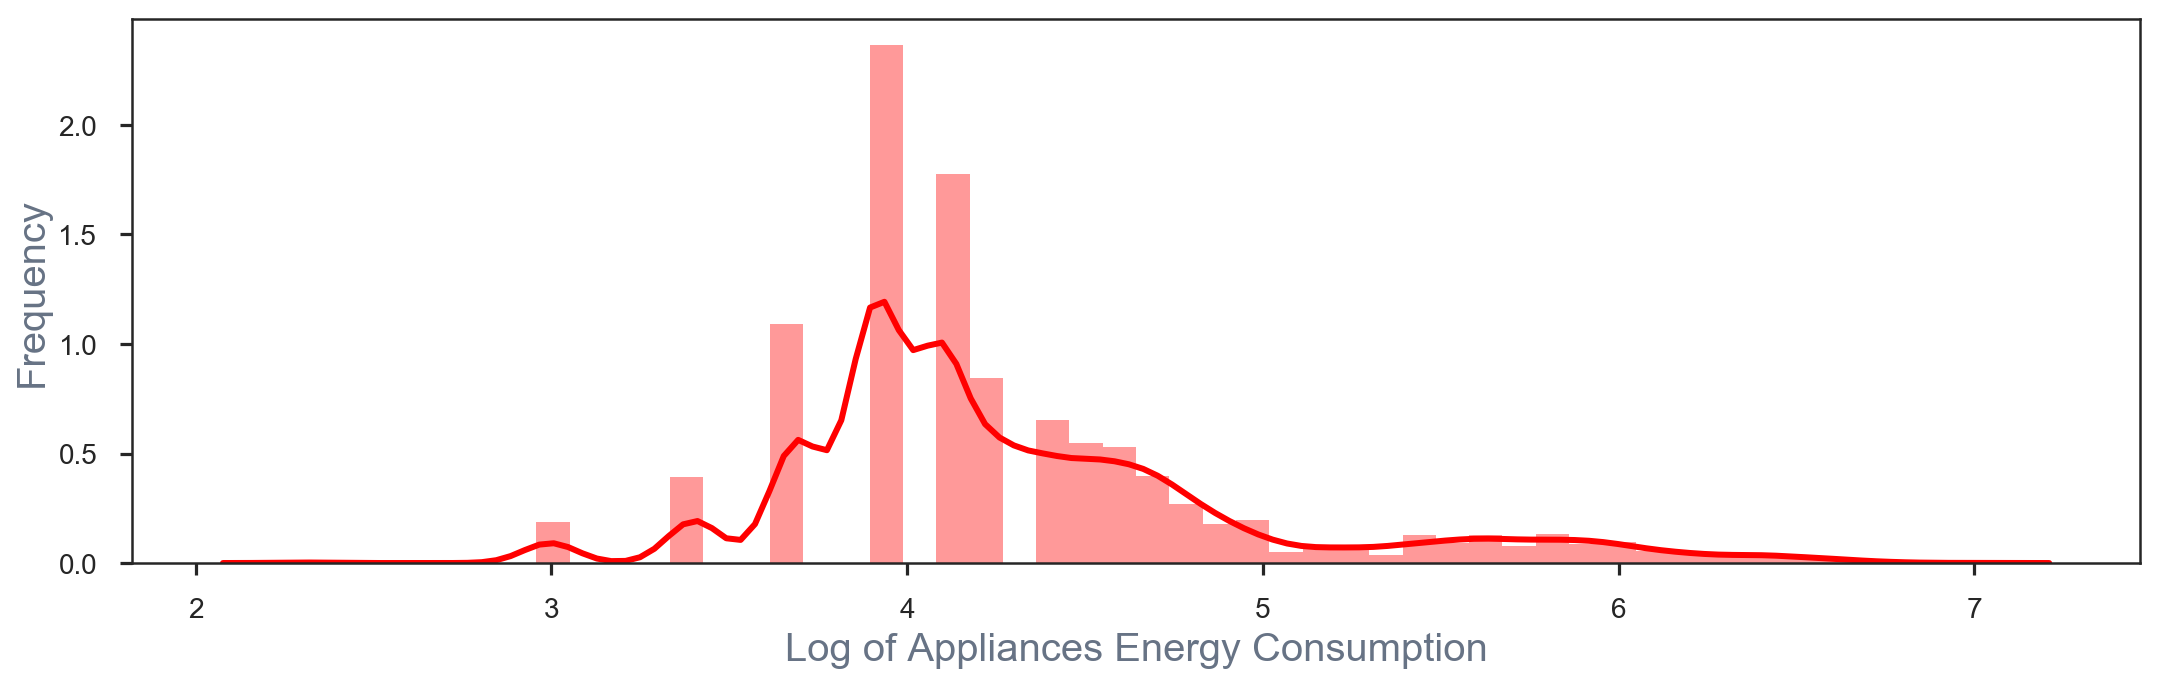

In [206]:
fig, ax1 = plt.subplots(figsize=(18,5))
sns.distplot(df.Appliances.apply(np.log), kde=True, color="red", ax=ax1)
ax1.set_ylabel("Frequency");
ax1.set_xlabel("Log of Appliances Energy Consumption");

### 2) Outside Temperatures & Humidities contributing to aggregate Energy Consumption

In [207]:
df[['T6', 'T_out', 'RH_6', 'RH_out']].describe().astype(int)

T6  T_out   RH_6  RH_out
count  19735  19735  19735   19735
mean       7      7     54      79
std        6      5     31      14
min       -6     -5      1      24
25%        3      3     30      70
50%        7      6     55      83
75%       11     10     83      91
max       28     26     99     100

In [208]:
df[['T6', 'T_out', 'RH_6', 'RH_out']].apply(scipy.stats.skew)

T6        0.597426
T_out     0.534232
RH_6     -0.241943
RH_out   -0.922927
dtype: float64

Skewness for normal distribution should be zero. Negative skewness indicates skew left and positive skewness indicates skew right.

In [209]:
df[['T6', 'T_out', 'RH_6', 'RH_out']].apply(scipy.stats.kurtosis)

T6        0.425137
T_out     0.363895
RH_6     -1.142079
RH_out    0.256490
dtype: float64

Kurtosis is also zero for a normal distribution and can only be postiive. The distribution for RH_6 is not Normal.

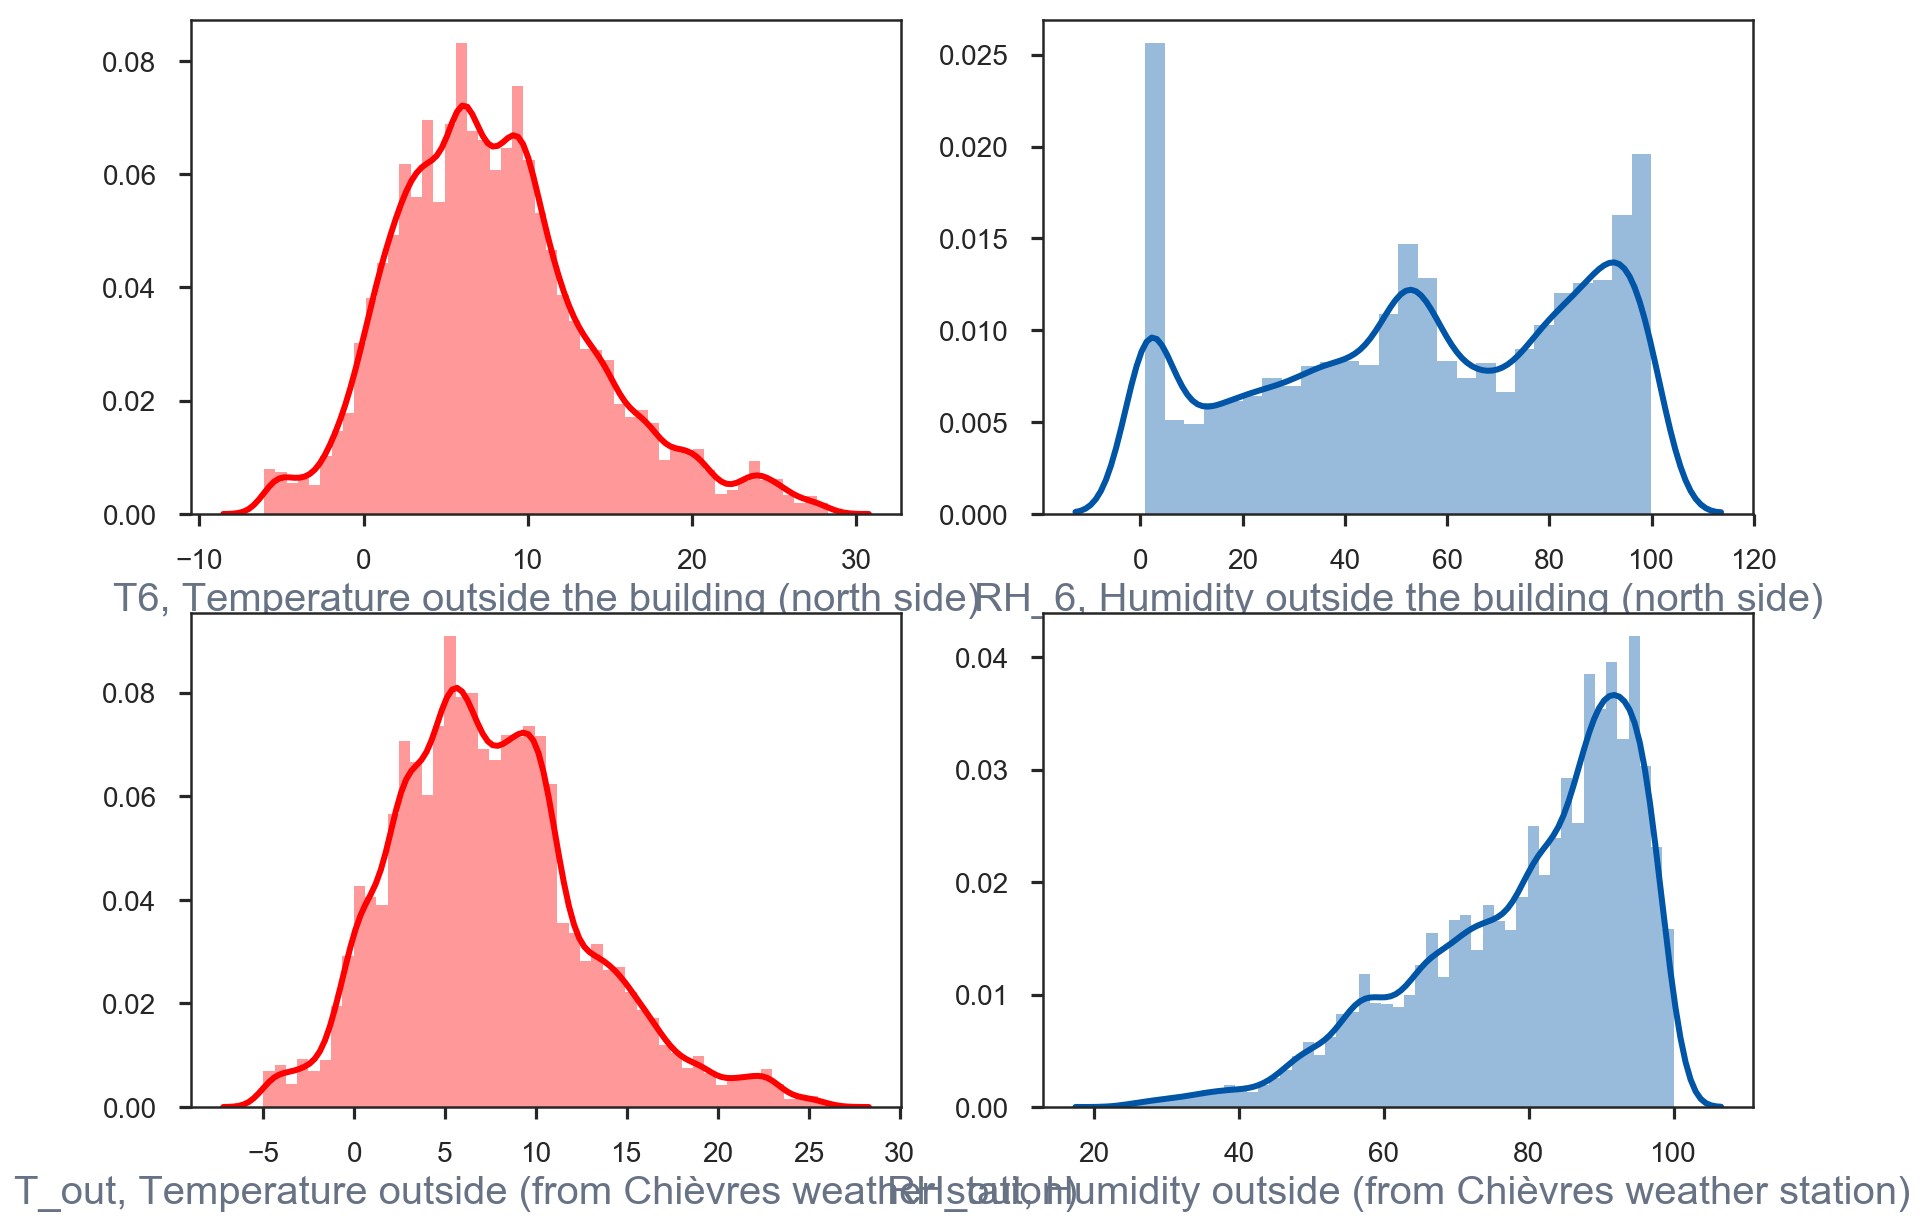

In [210]:
fig, ((ax1, ax3), (ax2, ax4)) = plt.subplots(figsize=(14,10), nrows=2, ncols=2)
sns.distplot(df.T6, color="red", ax=ax1, axlabel="T6, Temperature outside the building (north side)")
sns.distplot(df.T_out, color="red", ax=ax2, axlabel="T_out, Temperature outside (from Chièvres weather station)")
sns.distplot(df.RH_6, ax=ax3, axlabel="RH_6, Humidity outside the building (north side)")
sns.distplot(df.RH_out, ax=ax4, axlabel="RH_out, Humidity outside (from Chièvres weather station)");

It can be roughly be concluded:
* While the temperatures are related, **humidities vary significantly** between _Building Outside_ and _Chièvres Weather Station_
* Temparature peaks at 5°C and are normaly distributed

### Log Transform
> Taking a log transform will make a variable more normal. 

In [211]:
df[['T6', 'T_out', 'RH_6', 'RH_out']].apply(np.log).apply(scipy.stats.skew)

T6             NaN
T_out          NaN
RH_6     -1.862258
RH_out   -1.537867
dtype: float64

In [212]:
df[['T6', 'T_out', 'RH_6', 'RH_out']].apply(np.log).apply(scipy.stats.kurtosis)

T6             NaN
T_out          NaN
RH_6      2.529330
RH_out    2.815891
dtype: float64

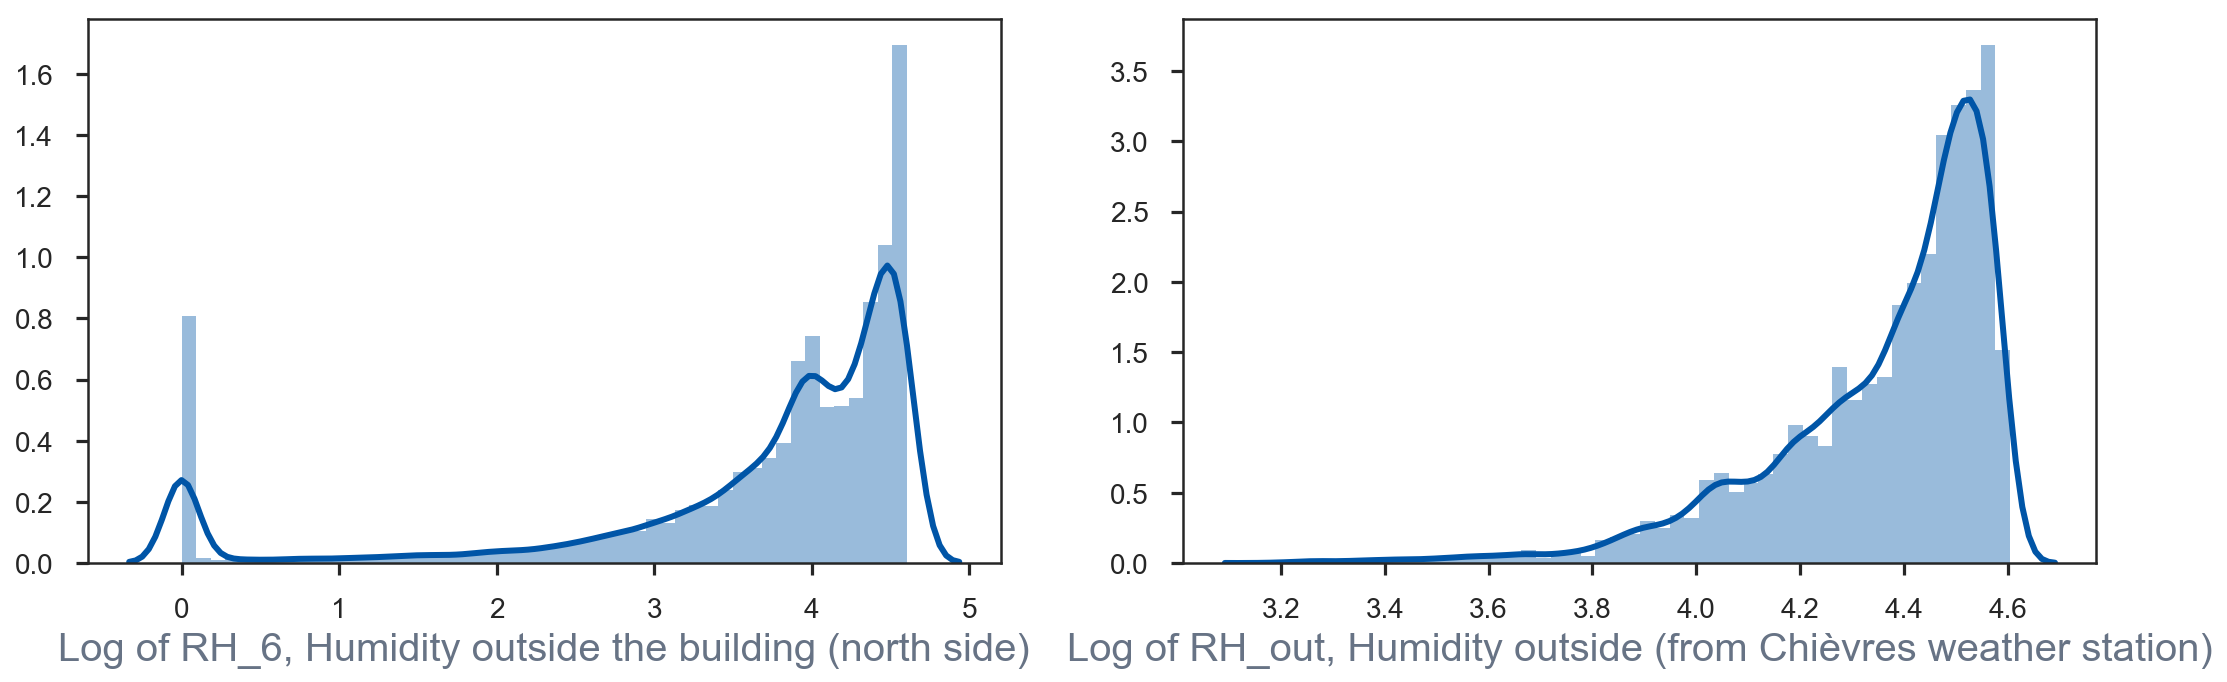

In [213]:
fig, ((ax3, ax4)) = plt.subplots(figsize=(18,5), ncols=2)
sns.distplot(df.RH_6.apply(np.log), ax=ax3, axlabel="Log of RH_6, Humidity outside the building (north side)")
sns.distplot(df.RH_out.apply(np.log), ax=ax4, axlabel="Log of RH_out, Humidity outside (from Chièvres weather station)");

## Examining Pair-Wise Relationship

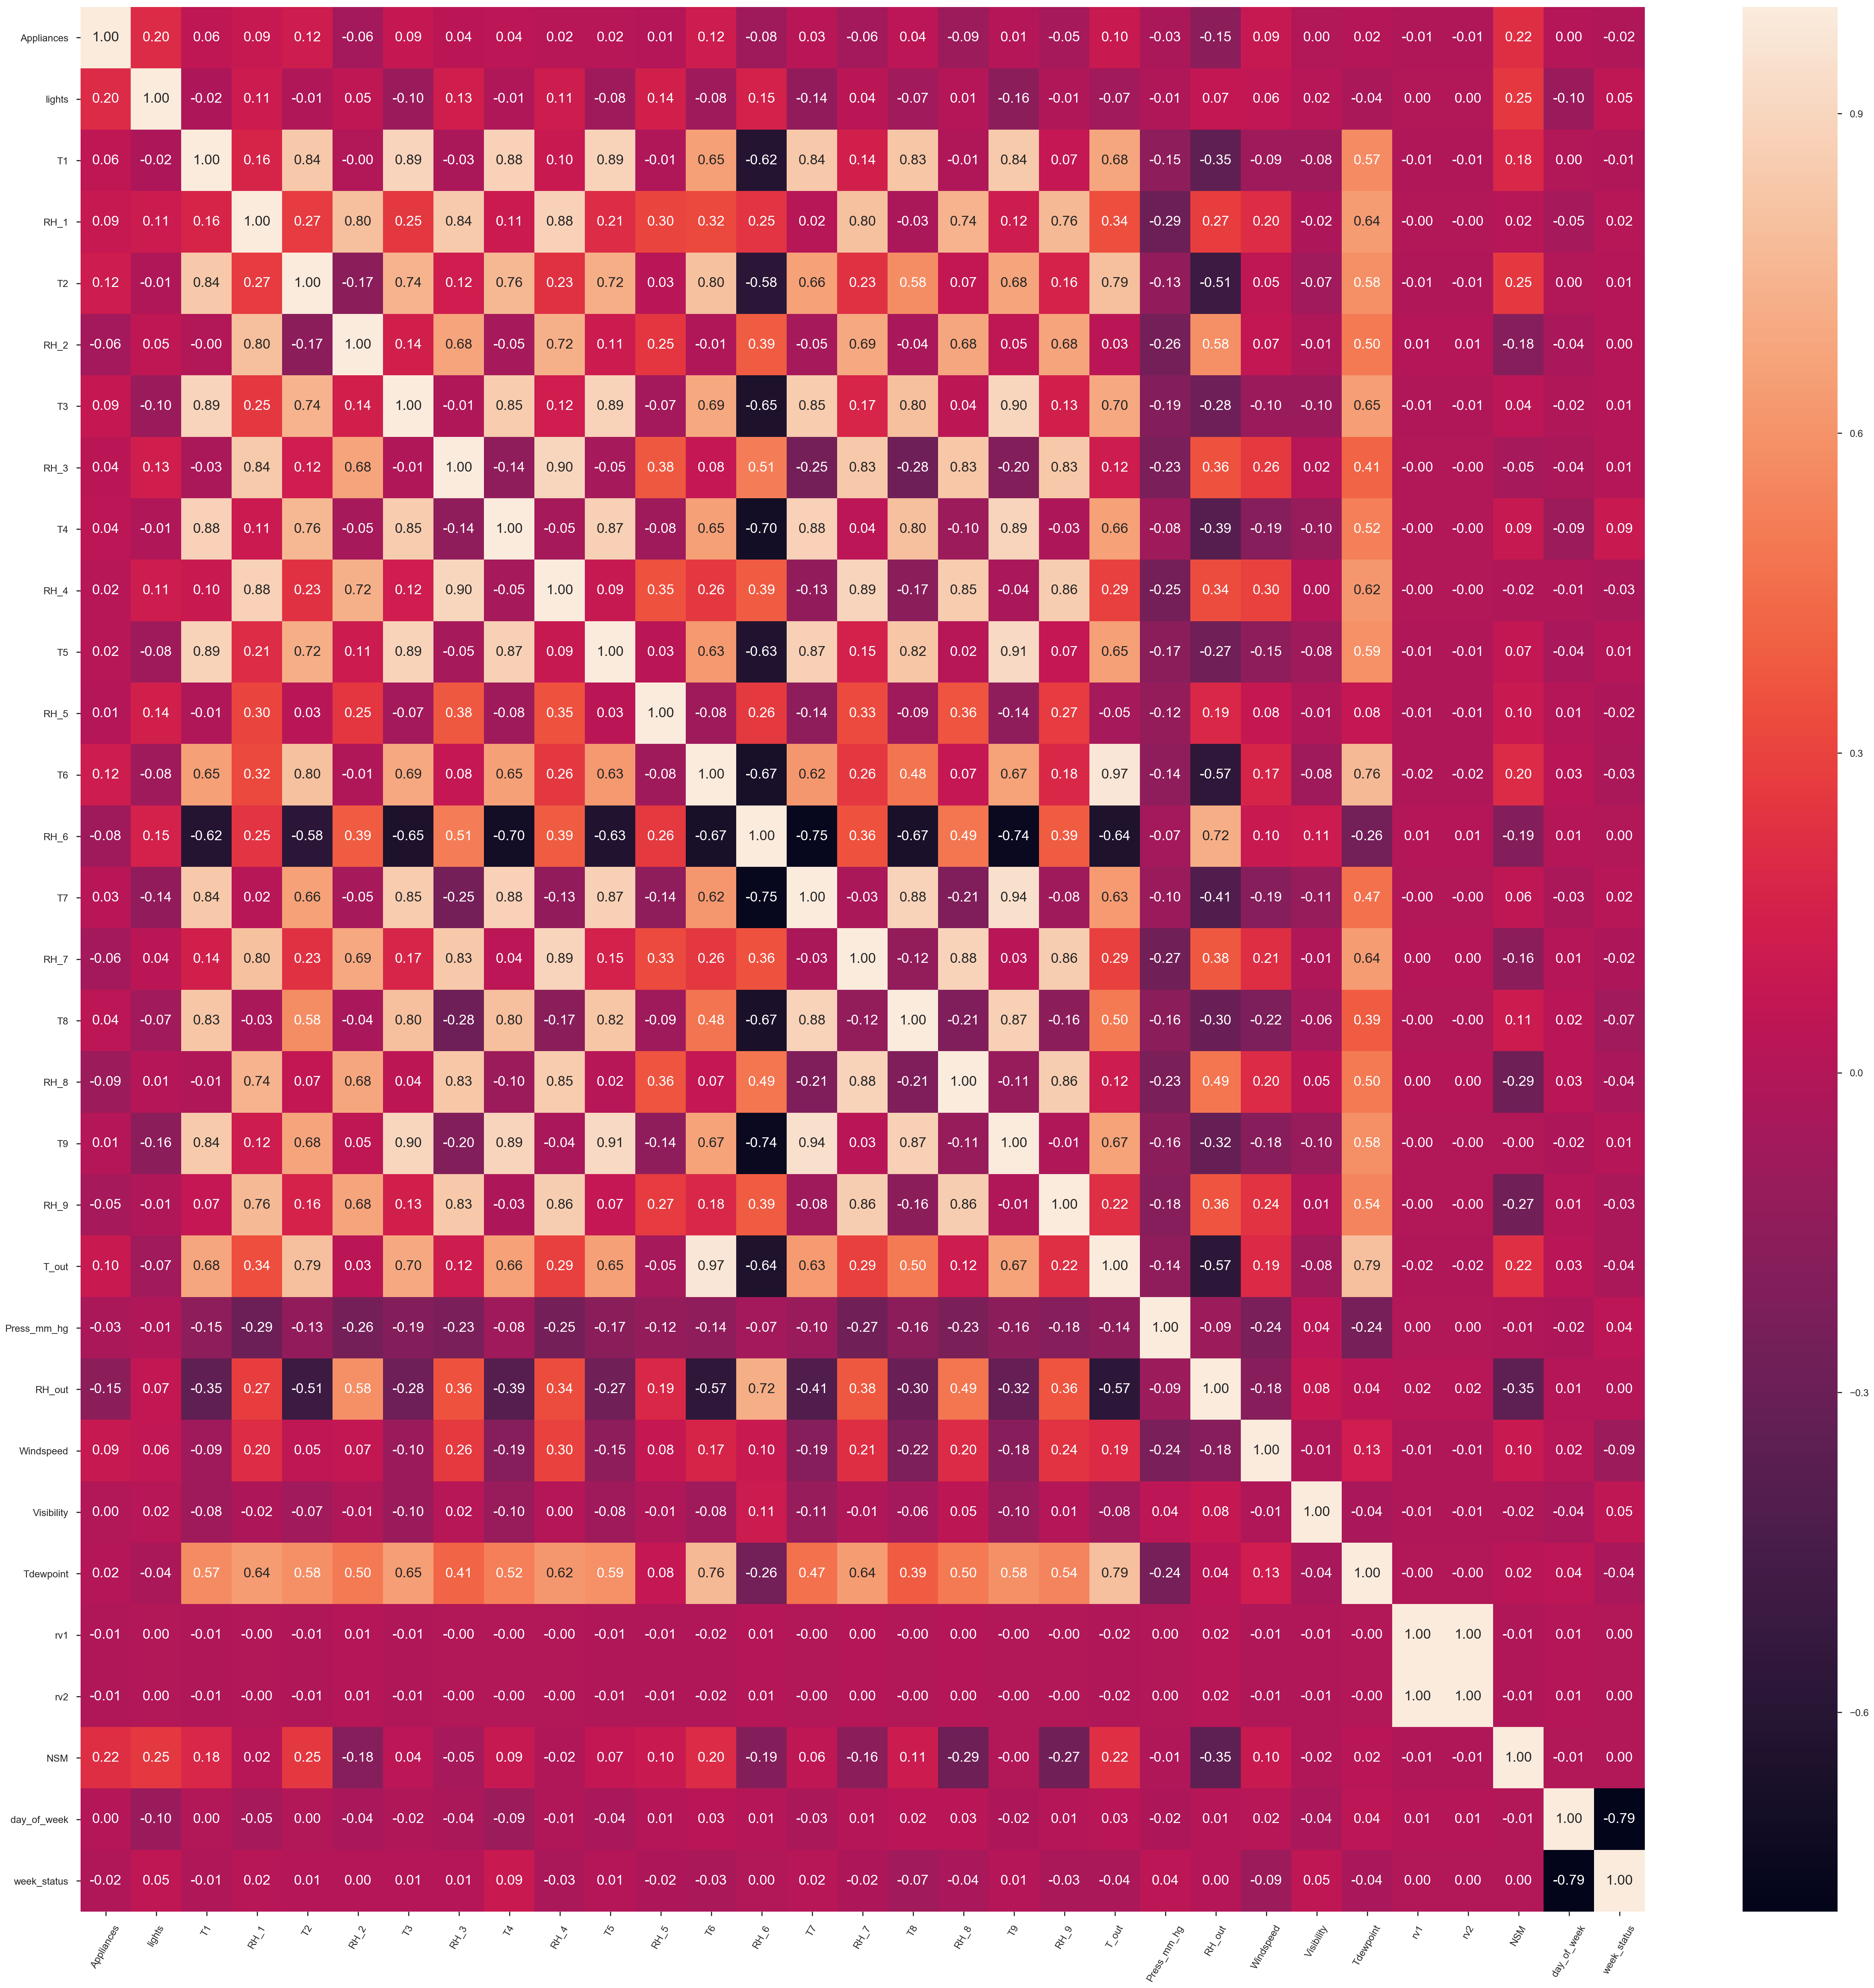

In [214]:
#Correlation Heat Map
plt.figure(figsize=(50,50));
a = sns.heatmap(df.corr(), annot=True, fmt=".2f", annot_kws={"size": 20});
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=60)
plt.show();

From the above correlation map, it can be deduced that only following attributes are closely related (as compared to others) to Appliance's Energy Consumption:

>| Variables, Description | Correlation |
| :------ | :----------- |
| Lights, Light energy consumption | 0.20 |
| T2, Temperature in living room area | 0.12 |
| T6, Temperature outside the building (north side) | 0.12 |
| T_out, Temperature outside (from Chièvres weather station) | 0.10 |
| RH_out, Humidity outside (from Chièvres weather station) | -0.15 |
| NSM, Number of seconds from midnight | 0.22 |

Below are the scatter plots of these attributes with respect to Appliances Energy Cosumption:

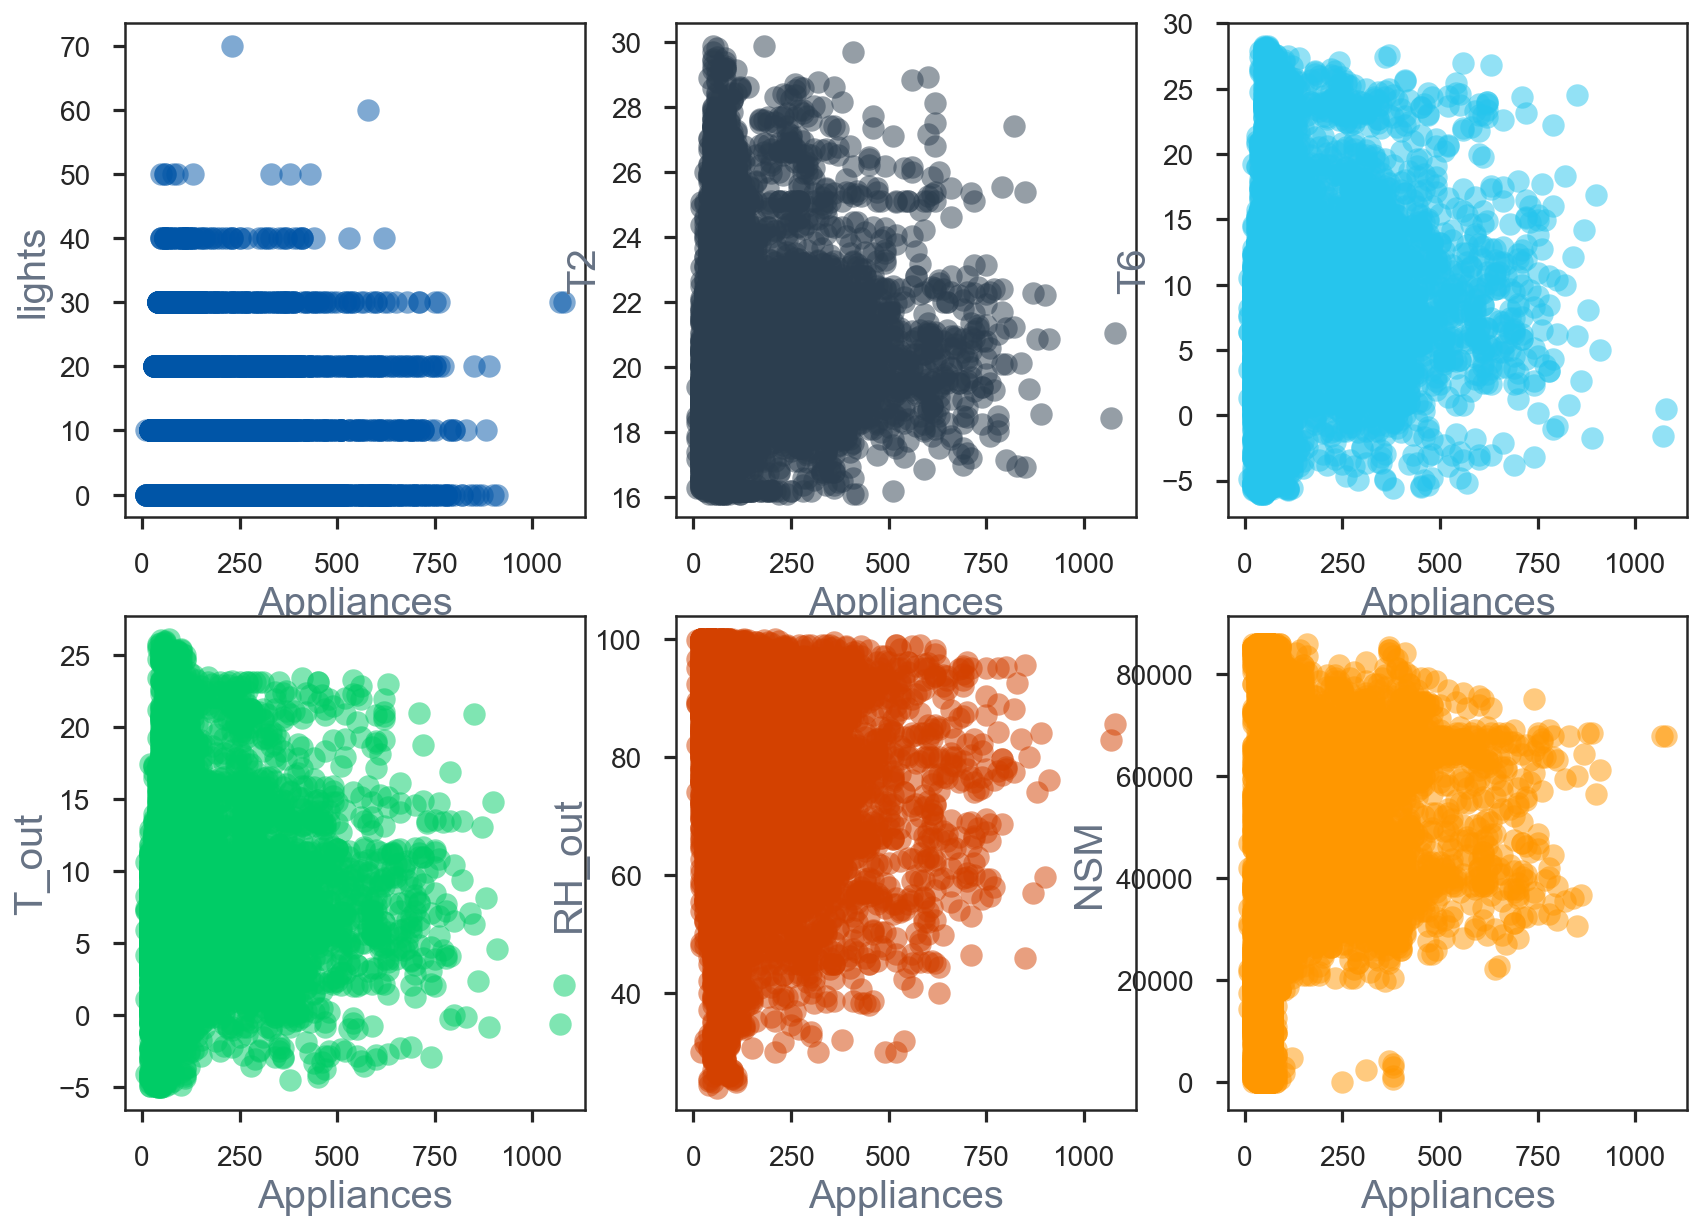

In [215]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(figsize=(14,10), nrows=2, ncols=3)
sns.regplot(x='Appliances', y='lights', data=df, fit_reg=False, scatter_kws={'alpha': 0.5}, ax = ax1)
sns.regplot(x='Appliances', y='T2', data=df, fit_reg=False, scatter_kws={'alpha': 0.5}, ax = ax2)
sns.regplot(x='Appliances', y='T6', data=df, fit_reg=False, scatter_kws={'alpha': 0.5}, ax = ax3)
sns.regplot(x='Appliances', y='T_out', data=df, fit_reg=False, scatter_kws={'alpha': 0.5}, ax = ax4)
sns.regplot(x='Appliances', y='RH_out', data=df, fit_reg=False, scatter_kws={'alpha': 0.5}, ax = ax5)
sns.regplot(x='Appliances', y='NSM', data=df, fit_reg=False, scatter_kws={'alpha': 0.5}, ax = ax6);

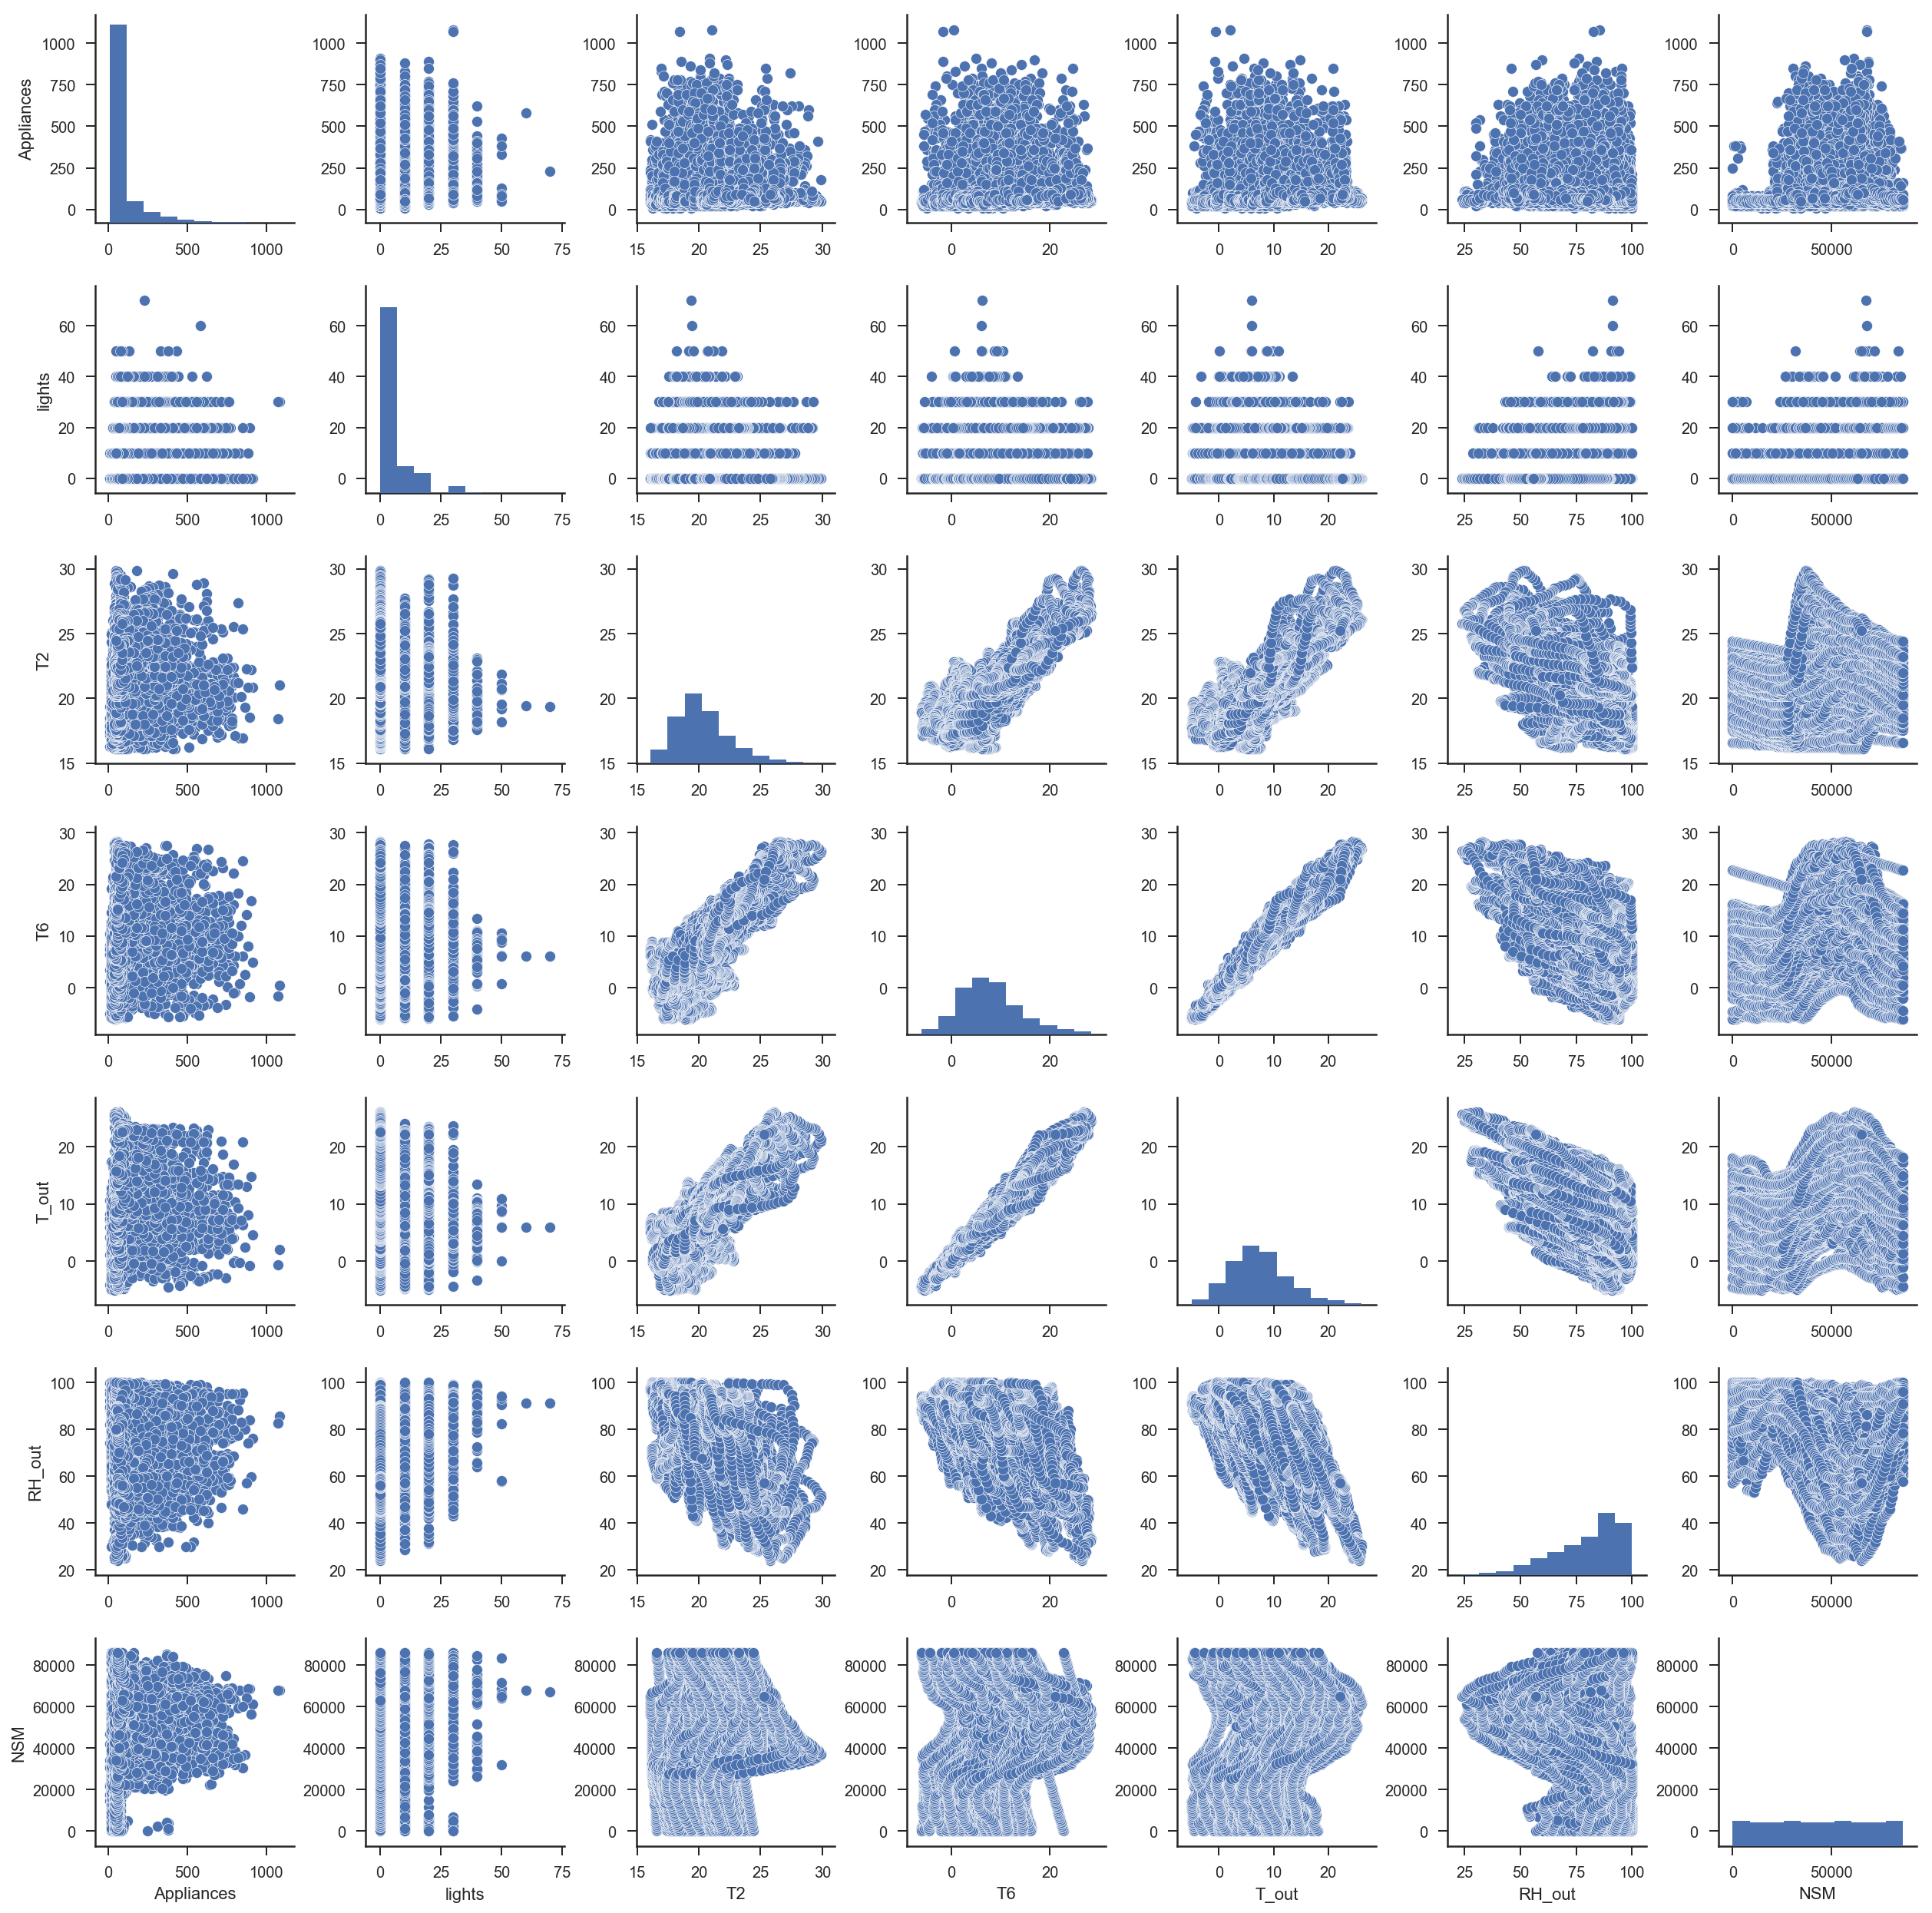

In [216]:
sns.set(style="ticks", color_codes=True);
sns.pairplot(df[['Appliances', 'lights', 'T2', 'T6', 'T_out', 'RH_out', 'NSM']]);

There are few very obvious outliers in these relationships. A quick check through the correlations:
 - Are there zeros?
     - Yes, zero is a possible observation for all the attributes except 'lights' which 77% of its data as zeros
 - Are there strange correlations?
     - Yes, the correlation is too scattered to figure out any pattern
     - NSM shows that appliances are usually used from morning 5:30am (20,000 sec past midnight) everyday
     - RH_out shows a rough interpretation that consumption increases with respect to the increase in humidity
 - Are there separate clusters (possible data recording error or anomaly)?
     - No, but there are many outliers

There are many non-linear relationships. One way to address this is to bin variables into categories and look at the distribution of other variables for each category. 

Let's look at the consumption of `Appliances` binned into quintiles.

In [217]:
consumption_bins = ['Very Low', 'Low', 'Medium', 'High', 'Very high']
df['Appliances_bin'] = pd.qcut(df.Appliances, 5, consumption_bins)
bin_ranges = pd.qcut(df.Appliances, 5).unique()
bin_ranges

[(50.0, 60.0], (9.999, 50.0], (60.0, 70.0], (110.0, 1080.0], (70.0, 110.0]]
Categories (5, interval[float64]): [(9.999, 50.0] < (50.0, 60.0] < (60.0, 70.0] < (70.0, 110.0] < (110.0, 1080.0]]

Now we have a CATEGORICAL X CONTINUOUS analysis. Let's look at the distribution of a few variables for each `Appliances` group. 

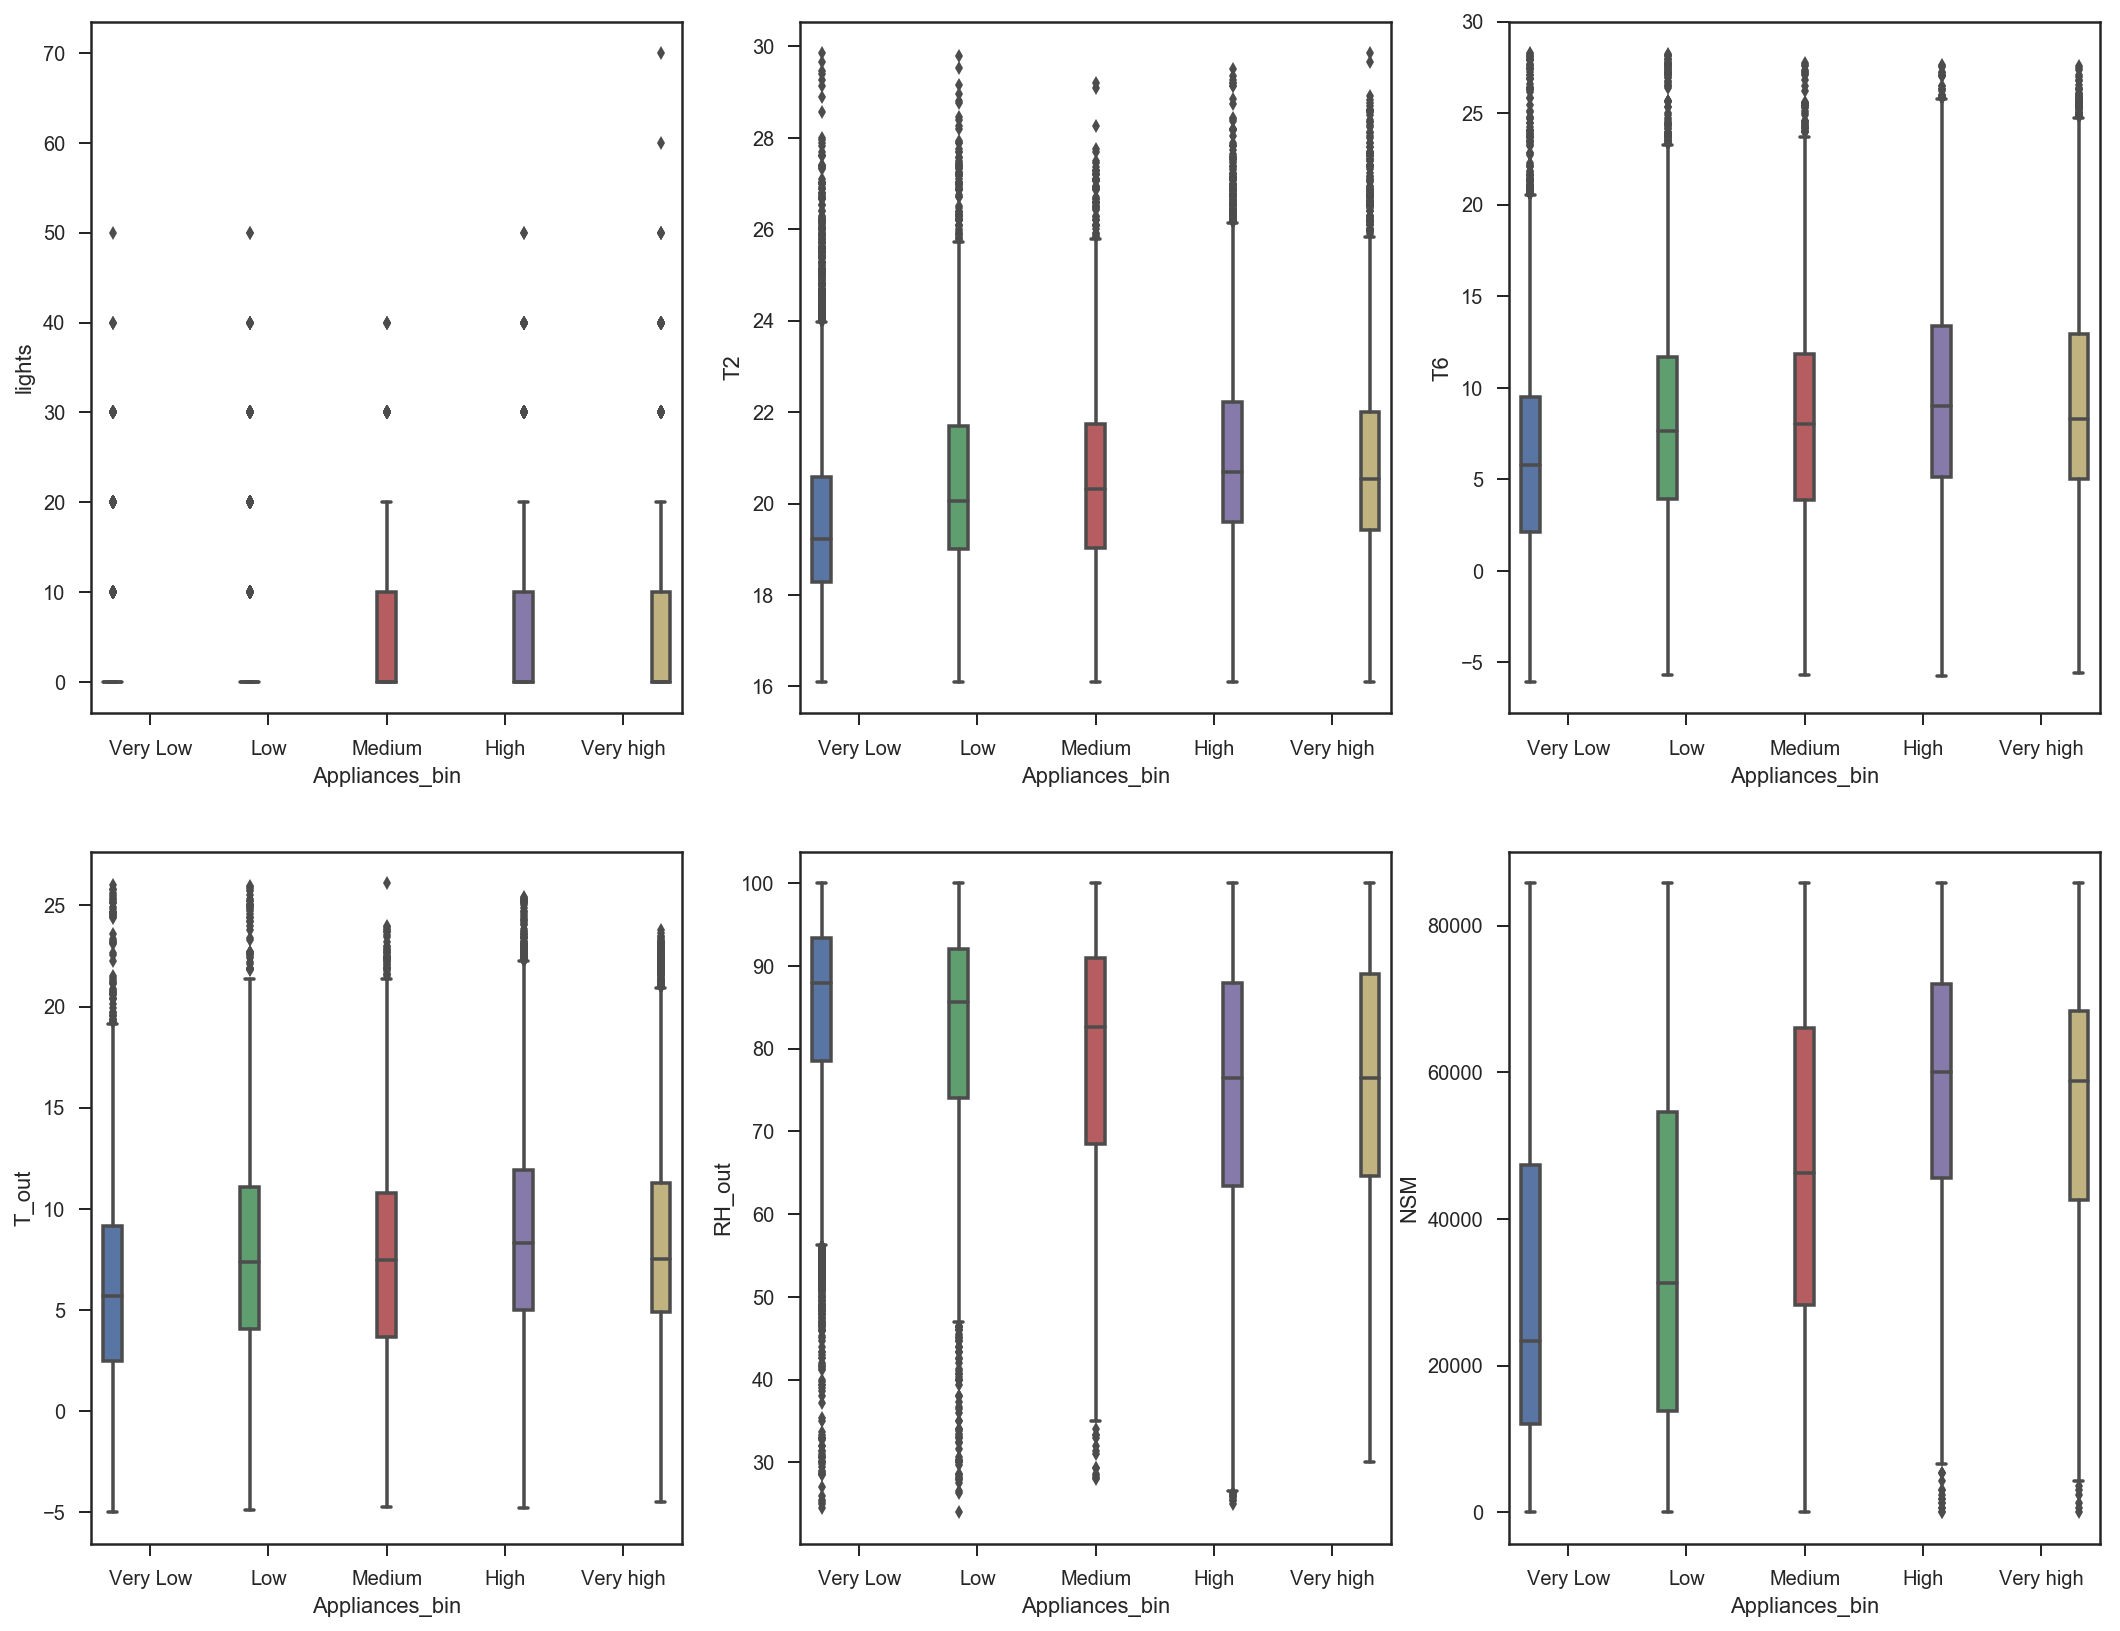

In [218]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(figsize=(18,14), nrows=2, ncols=3)
sns.boxplot(x='Appliances_bin', y='lights', hue='Appliances_bin', data=df, ax = ax1)
sns.boxplot(x='Appliances_bin', y='T2', hue='Appliances_bin', data=df, ax = ax2)
sns.boxplot(x='Appliances_bin', y='T6', hue='Appliances_bin', data=df, ax = ax3)
sns.boxplot(x='Appliances_bin', y='T_out', hue='Appliances_bin', data=df, ax = ax4)
sns.boxplot(x='Appliances_bin', y='RH_out', hue='Appliances_bin', data=df, ax = ax5)
sns.boxplot(x='Appliances_bin', y='NSM', hue='Appliances_bin', data=df, ax = ax6)
ax1.legend().set_visible(False)
ax2.legend().set_visible(False)
ax3.legend().set_visible(False)
ax4.legend().set_visible(False)
ax5.legend().set_visible(False)
ax6.legend().set_visible(False);

### Detecting Outliers for Each variable

Proceed with the following steps to detect outliers in the dataset:
>1. Arrange all the dataset points and calculate median
>2. Calculate the upper quartile
>3. Calculate the lower quartile
>4. Calculate the interquartile range
>> Product of numeric value of 1.5 and difference of the upper quartile(75%) and lower quartile(25%)
>> * 1.5 X (Upper Quartile - Lower Quartile)
>5. Calculate the inner fences for the dataset
>> Set of numerical boundaries which is classified as major and minor outlier:
>> * Major Outlier = Upper Quartile + Interquartile Range
>> * Minor Outlier = Lower Quartlie - Interquartile Range

Following are the outliers for each variable
<table>
    <thead class="valign-top">
        <tr>
            <th scope="col" class="rowsep-1 align-left">Variables</th>
            <th scope="col" class="rowsep-1 align-left">Upper Quartile</th>
            <th scope="col" class="rowsep-1 align-left">Lower Quartile</th>
            <th scope="col" class="rowsep-1 align-left">Interquartile Range</th>
            <th scope="col" class="rowsep-1 align-left">Major Outlier</th>
            <th scope="col" class="rowsep-1 align-left">Minor Outlier</th>
        </tr>
    </thead>
    <tbody>
        <tr>
        <th class="align-left" scope="row">T1</th>
            <td class="align-left">22.6</td>
            <td class="align-left">20.73</td>
            <td class="align-left">2.805</td>
            <td class="align-left">24.80</td>
            <td class="align-left">18.40</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">RH_1</th>
            <td class="align-left">43.09</td>
            <td class="align-left">37.36</td>
            <td class="align-left">8.595</td>
            <td class="align-left">51.25</td>
            <td class="align-left">28.50</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">T2</th>
            <td class="align-left">21.50</td>
            <td class="align-left">18.82</td>
            <td class="align-left">4.02</td>
            <td class="align-left">24.30</td>
            <td class="align-left">14.80</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">RH_2</th>
            <td class="align-left">43.29</td>
            <td class="align-left">37.90</td>
            <td class="align-left">8.08</td>
            <td class="align-left">50.50</td>
            <td class="align-left">32</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">T3</th>
            <td class="align-left">23.29</td>
            <td class="align-left">20.79</td>
            <td class="align-left">3.75</td>
            <td class="align-left">26.20</td>
            <td class="align-left">17.04</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">RH_3</th>
            <td class="align-left">41.76</td>
            <td class="align-left">36.90</td>
            <td class="align-left">7.29</td>
            <td class="align-left">46.50</td>
            <td class="align-left">30</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">T4</th>
            <td class="align-left">22.10</td>
            <td class="align-left">19.50</td>
            <td class="align-left">3.90</td>
            <td class="align-left">24.50</td>
            <td class="align-left">16.50</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">RH_4</th>
            <td class="align-left">42.13</td>
            <td class="align-left">35.53</td>
            <td class="align-left">9.90</td>
            <td class="align-left">49</td>
            <td class="align-left">25.60</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">T5</th>
            <td class="align-left">20.60</td>
            <td class="align-left">18.26</td>
            <td class="align-left">3.51</td>
            <td class="align-left">22.80</td>
            <td class="align-left">14.75</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">RH_5</th>
            <td class="align-left">53.66</td>
            <td class="align-left">45.40</td>
            <td class="align-left">12.39</td>
            <td class="align-left">62.80</td>
            <td class="align-left">34</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">T6</th>
            <td class="align-left">11.24</td>
            <td class="align-left">3.65</td>
            <td class="align-left">11.38</td>
            <td class="align-left">18</td>
            <td class="align-left">-7.73</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">RH_6</th>
            <td class="align-left">83.32</td>
            <td class="align-left">30.09</td>
            <td class="align-left">79.84</td>
            <td class="align-left">163.16</td>
            <td class="align-left">-49.75</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">T7</th>
            <td class="align-left">21.60</td>
            <td class="align-left">18.70</td>
            <td class="align-left">4.35</td>
            <td class="align-left">25.90</td>
            <td class="align-left">14.35</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">RH_7</th>
            <td class="align-left">39</td>
            <td class="align-left">31.50</td>
            <td class="align-left">11.25</td>
            <td class="align-left">47</td>
            <td class="align-left">20.25</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">T8</th>
            <td class="align-left">23.39</td>
            <td class="align-left">20.79</td>
            <td class="align-left">3.90</td>
            <td class="align-left">27.29</td>
            <td class="align-left">17.20</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">RH_8</th>
            <td class="align-left">46.56</td>
            <td class="align-left">39.06</td>
            <td class="align-left">11.25</td>
            <td class="align-left">54.70</td>
            <td class="align-left">27.81</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">T9</th>
            <td class="align-left">20.60</td>
            <td class="align-left">18</td>
            <td class="align-left">3.90</td>
            <td class="align-left">23.60</td>
            <td class="align-left">14.10</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">RH_9</th>
            <td class="align-left">44.36</td>
            <td class="align-left">38.50</td>
            <td class="align-left">8.79</td>
            <td class="align-left">50.50</td>
            <td class="align-left">32</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">T_out</th>
            <td class="align-left">10.40</td>
            <td class="align-left">3.66</td>
            <td class="align-left">10.11</td>
            <td class="align-left">17.50</td>
            <td class="align-left">-6.45</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">RH_out</th>
            <td class="align-left">91.66</td>
            <td class="align-left">70</td>
            <td class="align-left">32.49</td>
            <td class="align-left">124.15</td>
            <td class="align-left">46</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">Press_mm_hg</th>
            <td class="align-left">76.093</td>
            <td class="align-left">750.86</td>
            <td class="align-left">15.105</td>
            <td class="align-left">776.035</td>
            <td class="align-left">736</td>
        </tr>
        <tr>
            <th class="align-left" scope="row">Tdewpoint</th>
            <td class="align-left">6.53</td>
            <td class="align-left">0.9</td>
            <td class="align-left">8.445</td>
            <td class="align-left">12.50</td>
            <td class="align-left">-7.54</td>
         </tr>
            
        




In [221]:
df_describe = df.describe().T

In [222]:
df_describe['Interquartile Range'] = 1.5*(df_describe['75%'] - df_describe['25%'])

In [223]:
df_describe['Major Outlier'] = (df_describe['75%'] + df_describe['Interquartile Range'])
df_describe['Minor Outlier'] = (df_describe['25%'] - df_describe['Interquartile Range'])

In [224]:
df_describe

count          mean           std         min           25%  \
Appliances   19735.0     97.694958    102.524891   10.000000     50.000000   
lights       19735.0      3.801875      7.935988    0.000000      0.000000   
T1           19735.0     21.686571      1.606066   16.790000     20.760000   
RH_1         19735.0     40.259739      3.979299   27.023333     37.333333   
T2           19735.0     20.341219      2.192974   16.100000     18.790000   
RH_2         19735.0     40.420420      4.069813   20.463333     37.900000   
T3           19735.0     22.267611      2.006111   17.200000     20.790000   
RH_3         19735.0     39.242500      3.254576   28.766667     36.900000   
T4           19735.0     20.855335      2.042884   15.100000     19.530000   
RH_4         19735.0     39.026904      4.341321   27.660000     35.530000   
T5           19735.0     19.592106      1.844623   15.330000     18.277500   
RH_5         19735.0     50.949283      9.022034   29.815000     45.400000   
T6           19735.0      7.910939      6.090347   -6.065000      3.626667   
RH_6         19735.0     54.609083     31.149806    1.000000     30.025000   
T7           19735.0     20.267106      2.109993   15.390000     18.700000   
RH_7         19735.0     35.388200      5.114208   23.200000     31.500000   
T8           19735.0     22.029107      1.956162   16.306667     20.790000   
RH_8         19735.0     42.936165      5.224361   29.600000     39.066667   
T9           19735.0     19.485828      2.014712   14.890000     18.000000   
RH_9         19735.0     41.552401      4.151497   29.166667     38.500000   
T_out        19735.0      7.411665      5.317409   -5.000000      3.666667   
Press_mm_hg  19735.0    755.522602      7.399441  729.300000    750.933333   
RH_out       19735.0     79.750418     14.901088   24.000000     70.333333   
Windspeed    19735.0      4.039752      2.451221    0.000000      2.000000   
Visibility   19735.0     38.330834     11.794719    1.000000     29.000000   
Tdewpoint    19735.0      3.760707      4.194648   -6.600000      0.900000   
rv1          19735.0     24.988033     14.496634    0.005322     12.497889   
rv2          19735.0     24.988033     14.496634    0.005322     12.497889   
NSM          19735.0  42907.129465  24940.020831    0.000000  21600.000000   
day_of_week  19735.0      2.977249      1.985617    0.000000      1.000000   
week_status  19735.0      0.722726      0.447664    0.000000      0.000000   

                      50%           75%           max  Interquartile Range  \
Appliances      60.000000    100.000000   1080.000000            75.000000   
lights           0.000000      0.000000     70.000000             0.000000   
T1              21.600000     22.600000     26.260000             2.760000   
RH_1            39.656667     43.066667     63.360000             8.600000   
T2              20.000000     21.500000     29.856667             4.065000   
RH_2            40.500000     43.260000     56.026667             8.040000   
T3              22.100000     23.290000     29.236000             3.750000   
RH_3            38.530000     41.760000     50.163333             7.290000   
T4              20.666667     22.100000     26.200000             3.855000   
RH_4            38.400000     42.156667     51.090000             9.940000   
T5              19.390000     20.619643     25.795000             3.513214   
RH_5            49.090000     53.663333     96.321667            12.395000   
T6               7.300000     11.256000     28.290000            11.444000   
RH_6            55.290000     83.226667     99.900000            79.802500   
T7              20.033333     21.600000     26.000000             4.350000   
RH_7            34.863333     39.000000     51.400000            11.250000   
T8              22.100000     23.390000     27.230000             3.900000   
RH_8            42.375000     46.536000     58.780000            11.204000   
T9              19.390000     20.600

### Removing Outliers from Specific Variables
> Excluding:
> * RH_6, Humidity outside the building (north side)
> * RH_out, Humidity outside (from Chièvres weather station)
> * Windspeed, Windspeed (from Chièvres weather station)
> * Visibility, Visibility (from Chièvres weather station)
> * rv1, Random Variable 1
> * rv2, Random Variable 2

Following drops will only remove max. 15% of the data, which is acceptable

In [225]:
def remove_outlier(df, variable):
    major_o = df_describe.loc[variable,'Major Outlier']
    minor_o = df_describe.loc[variable,'Minor Outlier']
    df = df.drop(df[(df[variable]>major_o) | (df[variable]<minor_o)].index)
    return df

In [226]:
outlier_column_list = [x for x in all_columns 
                       if x not in ('date', 'Appliances', 'lights', 'RH_6', 'RH_out', 'Windspeed', 'Visibility', 'rv1', 'rv2')]

In [227]:
for column_name in outlier_column_list:
    df = remove_outlier(df, column_name)

In [228]:
# Percentage of Data Dropped
((df_loaded.shape[0] - df.shape[0])/df_loaded.shape[0])*100

14.83151760831011

## Pandas Profiling

There is a library that gives a high level overview -- https://github.com/JosPolfliet/pandas-profiling

In [229]:
pandas_profiling.ProfileReport(df)

From the above warnings, following can be deduced:
* Dropping the highly correlated attributes:
    * T9, Temperature in parents room and T7, Temperature in ironing room (ρ = 0.94478)
        * T9 is matter of importance, hence considering to **drop T7**
    * T_out, Temperature outside (from Chièvres weather station) and T6, Temperature outside the building (north side) (ρ = 0.97479)
        * As RH_out is more in correlation with 'Appliances' as compared to RH_6, considering to **drop T6**
    * rv2, Random Variable 2 and rv1, Random Variable 1 (ρ = 1)
        * As both of these attributes are equal, considering to **drop rv2**

In [230]:
df = df.drop(['T7', 'T6', 'rv2'], axis=1)

In [231]:
# Pivot table created for reference
pivottablejs.pivot_ui(df)

In [232]:
# Exporting the cleaned dataset
df.to_csv('energydata_complete_cleaned.csv')